# XY - Modell

In [2]:
# Standard imports for computational physics
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd
import sqlite3
import json
from scipy.optimize import curve_fit
import scienceplots

# Pretty styling for graphs
plt.style.use(['science', 'grid', 'scatter'])
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["figure.dpi"] = 300

# Select most recent run

In [3]:
con = sqlite3.connect('output.sqlite')
current_run = pd.read_sql_query('SELECT id FROM runs ORDER BY created_at DESC', con).at[0, 'id']

# Energy

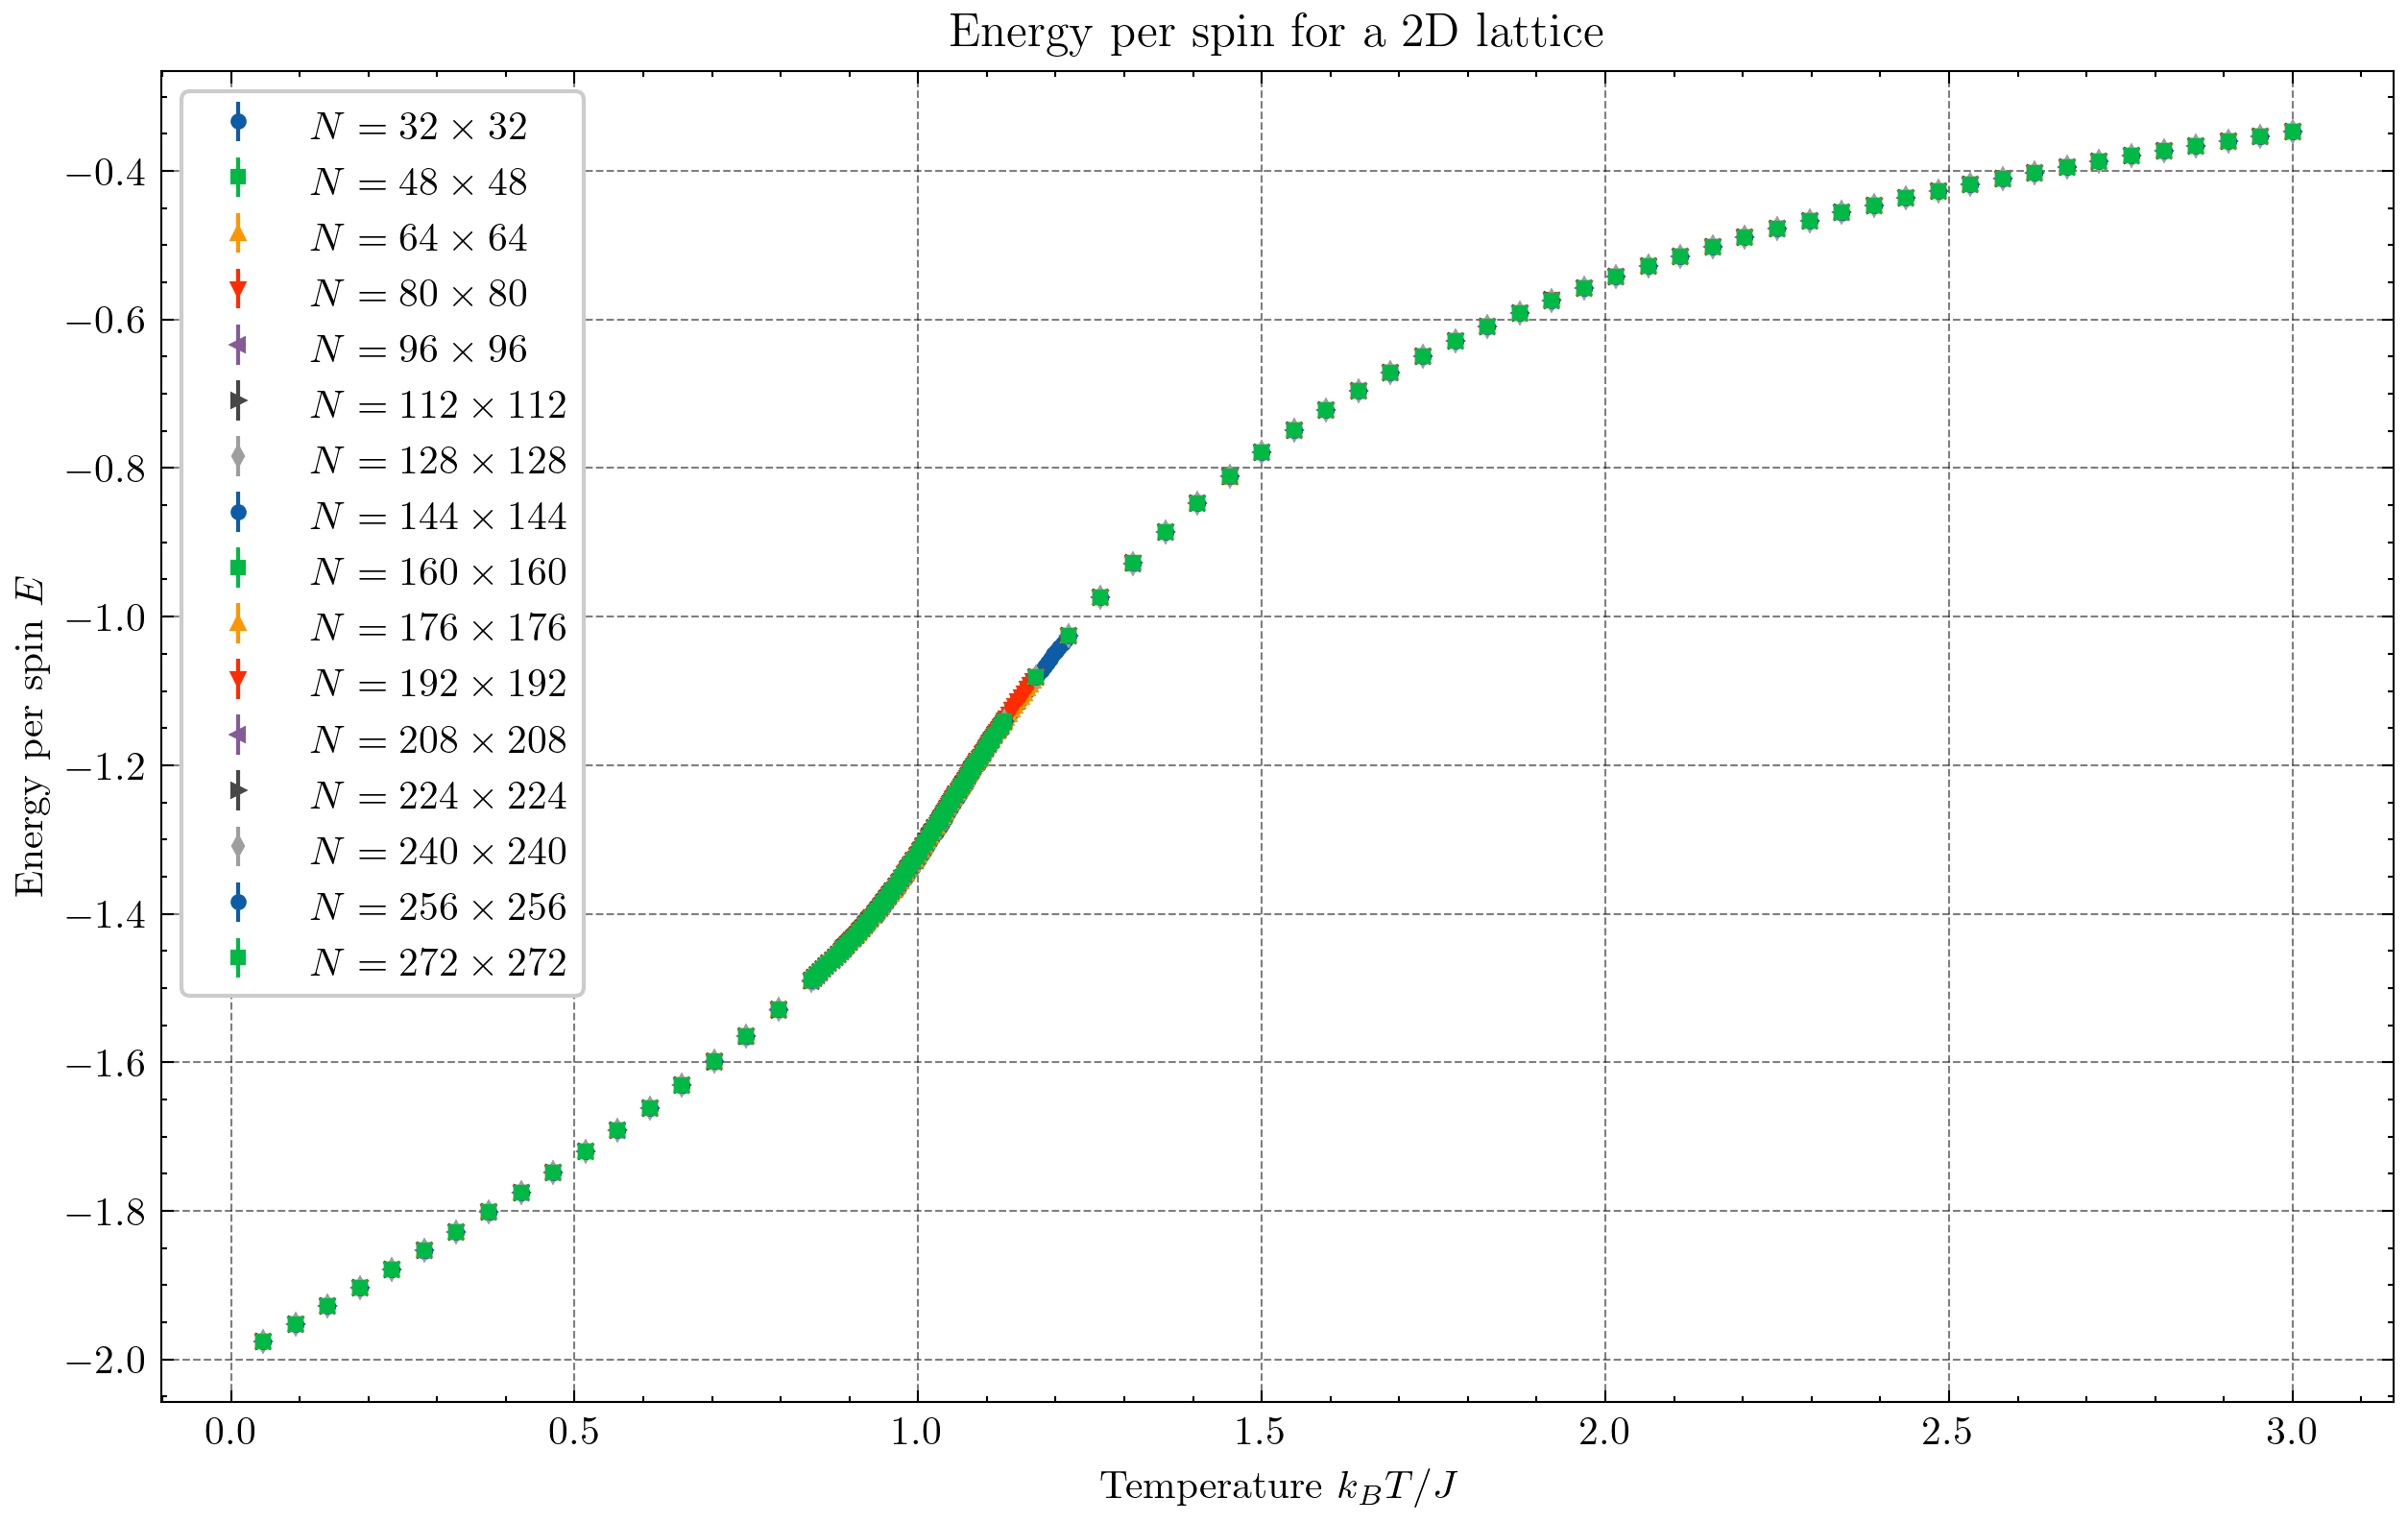

In [4]:
fig, ax = plt.subplots()
for size in pd.read_sql_query(f'SELECT size FROM results WHERE dimension = 2 AND run_id = \'{current_run}\' GROUP BY dimension, size ORDER BY dimension', con)['size']:
    data = pd.read_sql_query(f'SELECT temperature, energy, energy_std FROM results WHERE dimension = 2 AND run_id = \'{current_run}\' AND size = \'{size}\' ORDER BY temperature', con)
    ax.errorbar(data['temperature'], data['energy'], yerr=data['energy_std'], label=f'$N = {size} \\times {size}$')

    ax.set_title(f'Energy per spin for a 2D lattice')
    ax.set_xlabel('Temperature $k_B T / J$')
    ax.set_ylabel('Energy per spin $E$')

    ax.legend()

fig.savefig('figures/Energy.pdf', bbox_inches='tight')

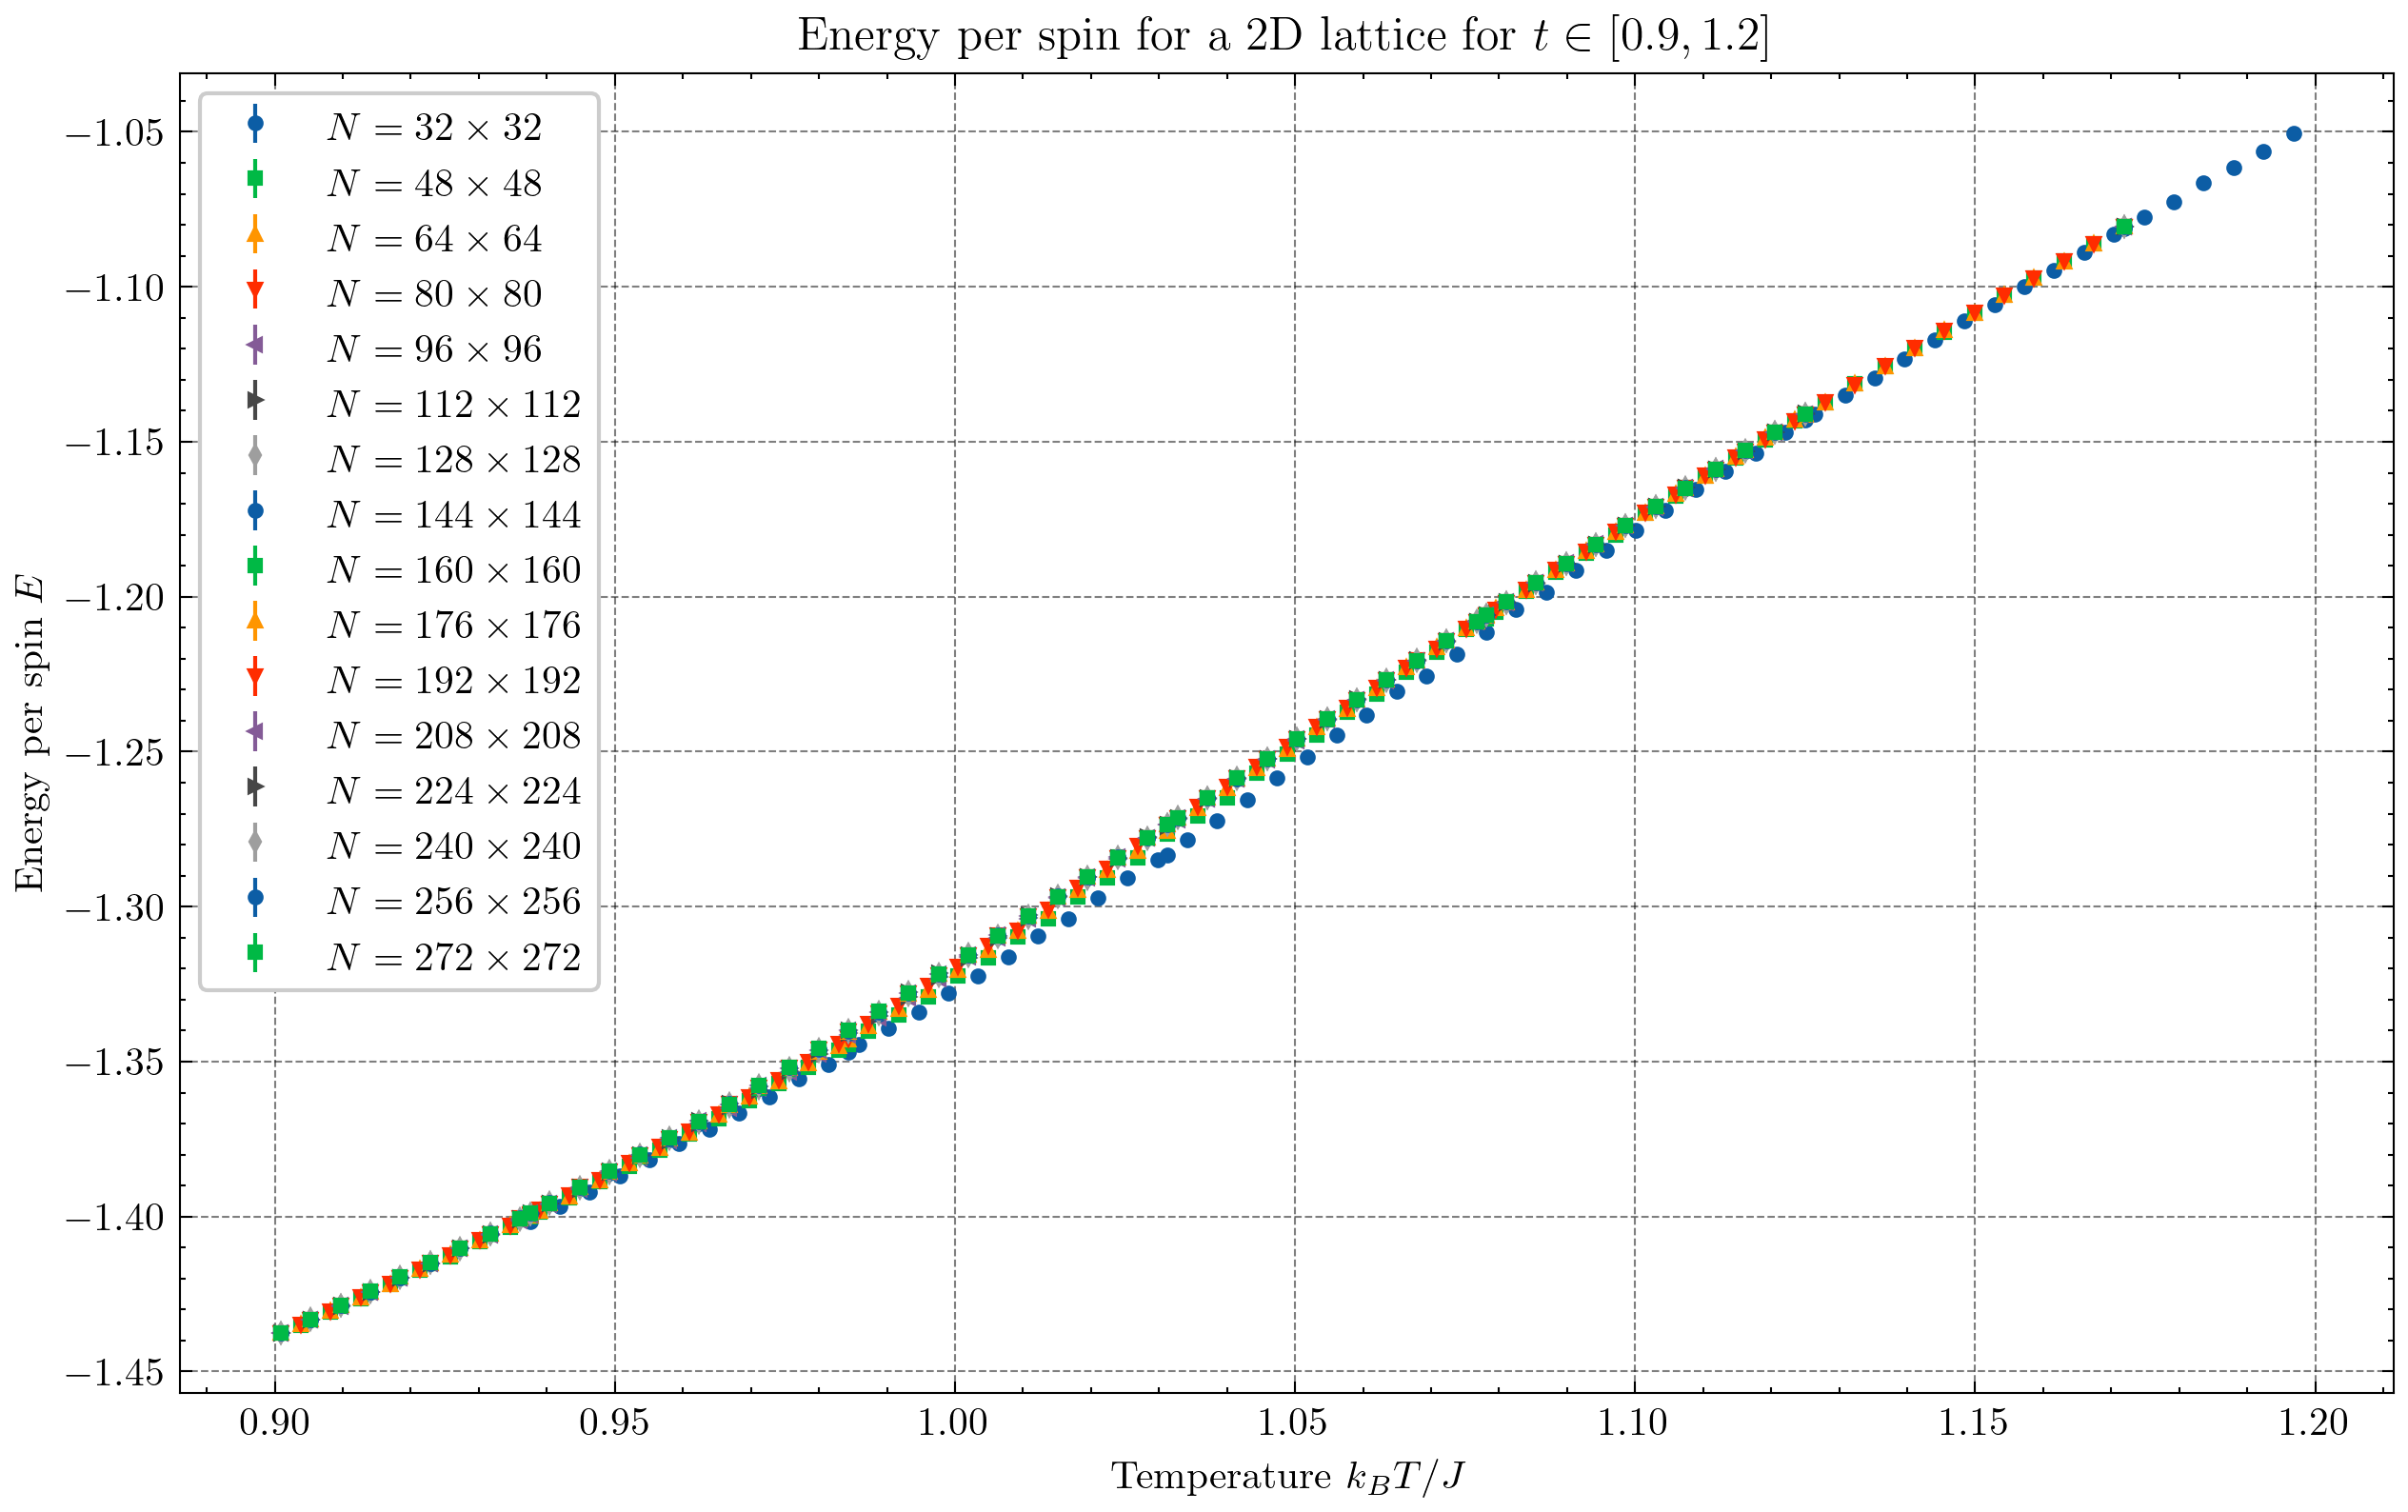

In [5]:
fig, ax = plt.subplots()
for size in pd.read_sql_query(f'SELECT size FROM results WHERE dimension = 2 AND run_id = \'{current_run}\' GROUP BY dimension, size ORDER BY dimension', con)['size']:
    data = pd.read_sql_query(f'SELECT temperature, energy, energy_std FROM results WHERE dimension = 2 AND run_id = \'{current_run}\' AND size = \'{size}\' AND temperature >= 0.9 AND temperature <= 1.2 ORDER BY temperature', con)
    ax.errorbar(data['temperature'], data['energy'], yerr=data['energy_std'], label=f'$N = {size} \\times {size}$')

    ax.set_title(f'Energy per spin for a 2D lattice for $t\\in [0.9,1.2]$')
    ax.set_xlabel('Temperature $k_B T / J$')
    ax.set_ylabel('Energy per spin $E$')

    ax.legend()

fig.savefig('figures/Energy_CloseUp.pdf', bbox_inches='tight')

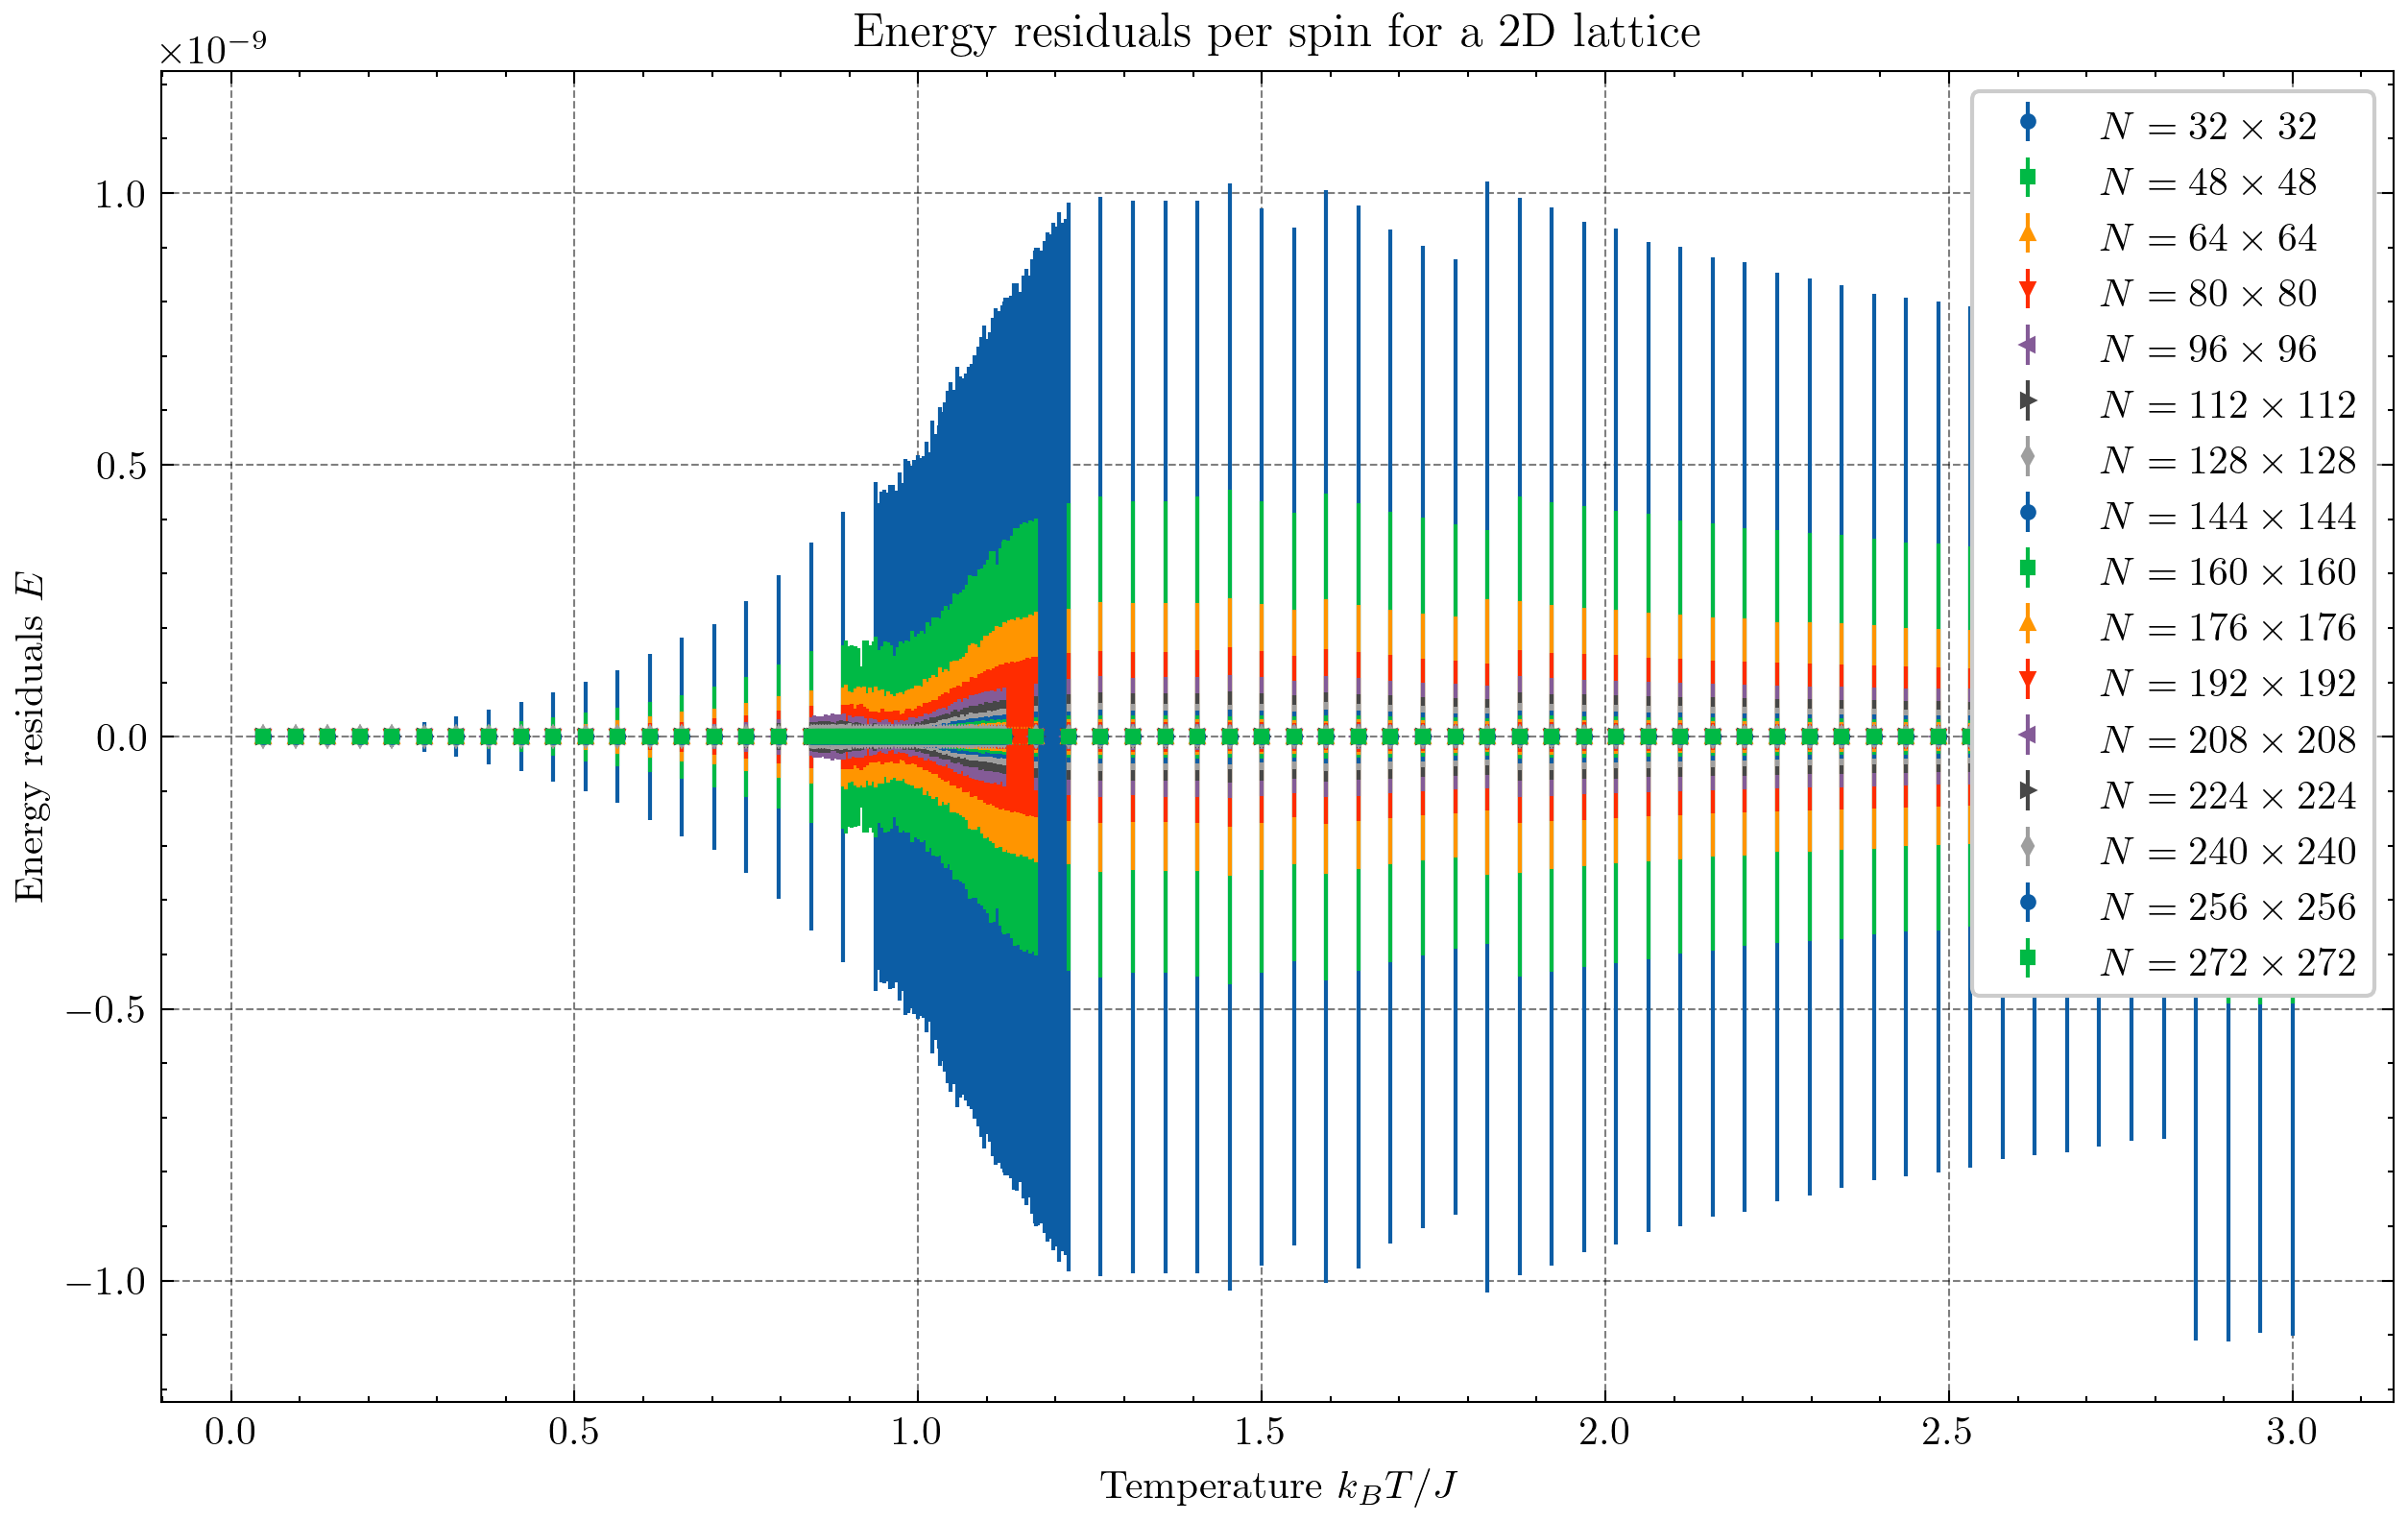

In [6]:
fig, ax = plt.subplots()
for size in pd.read_sql_query(f'SELECT dimension, size FROM results WHERE dimension = 2 AND run_id = \'{current_run}\' GROUP BY dimension, size ORDER BY dimension', con)['size']:
    data = pd.read_sql_query(f'SELECT temperature, energy, energy_std FROM results WHERE dimension = 2 AND run_id = \'{current_run}\' AND size = \'{size}\' ORDER BY temperature', con)
    ax.errorbar(data['temperature'], [0] * len(data['energy_std']), yerr=data['energy_std'], label=f'$N = {size} \\times {size}$')

    ax.set_title(f'Energy residuals per spin for a 2D lattice')
    ax.set_xlabel('Temperature $k_B T / J$')
    ax.set_ylabel('Energy residuals $E$')

    ax.legend()

fig.savefig('figures/Energy_Residual.pdf', bbox_inches='tight')

# Magnetisation

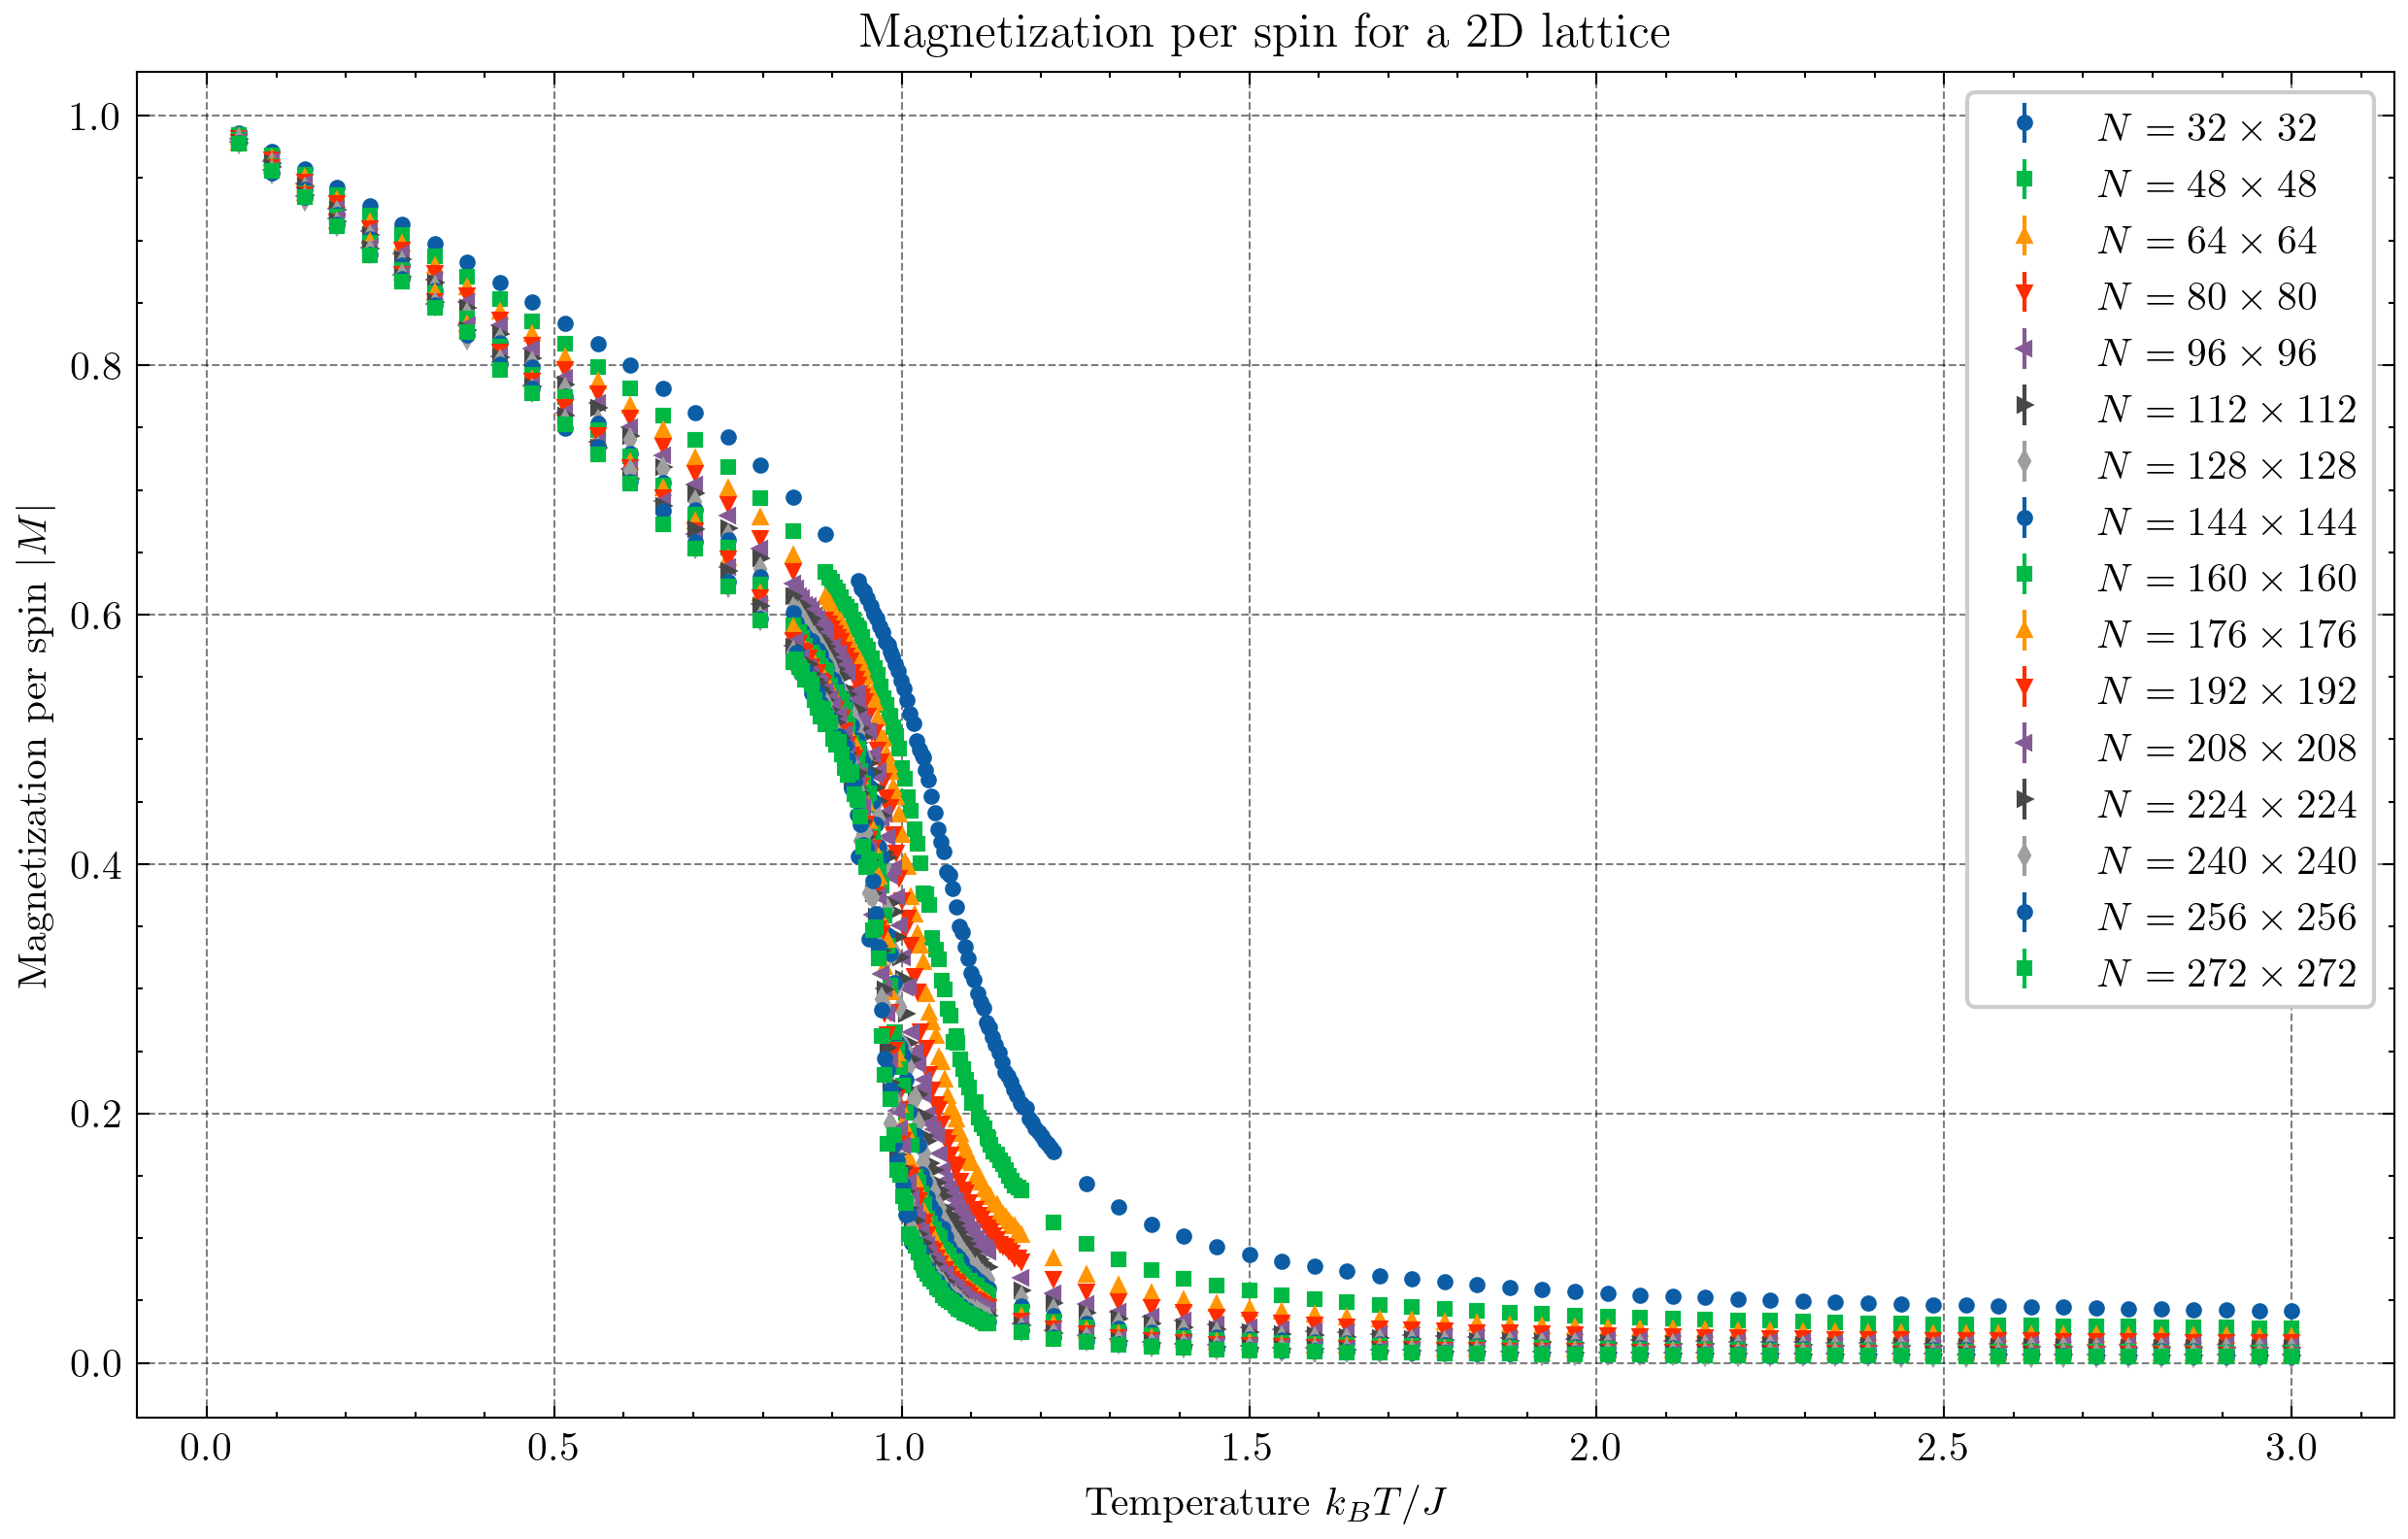

In [7]:
fig, ax = plt.subplots()
for size in pd.read_sql_query(f'SELECT size FROM results WHERE dimension = 2 AND run_id = \'{current_run}\' GROUP BY size ORDER BY size', con)['size']:
    data = pd.read_sql_query(f'SELECT temperature, magnet, magnet_std FROM results WHERE dimension = 2 AND run_id = \'{current_run}\' AND size = \'{size}\' ORDER BY temperature', con)
    ax.errorbar(data['temperature'], data['magnet'], yerr=data['magnet_std'], label=f'$N = {size} \\times {size}$')

    ax.set_title(f'Magnetization per spin for a 2D lattice')
    ax.set_xlabel('Temperature $k_B T / J$')
    ax.set_ylabel('Magnetization per spin $\\lvert M \\rvert$')

    ax.legend()

fig.savefig('figures/Magnetization.pdf', bbox_inches='tight')

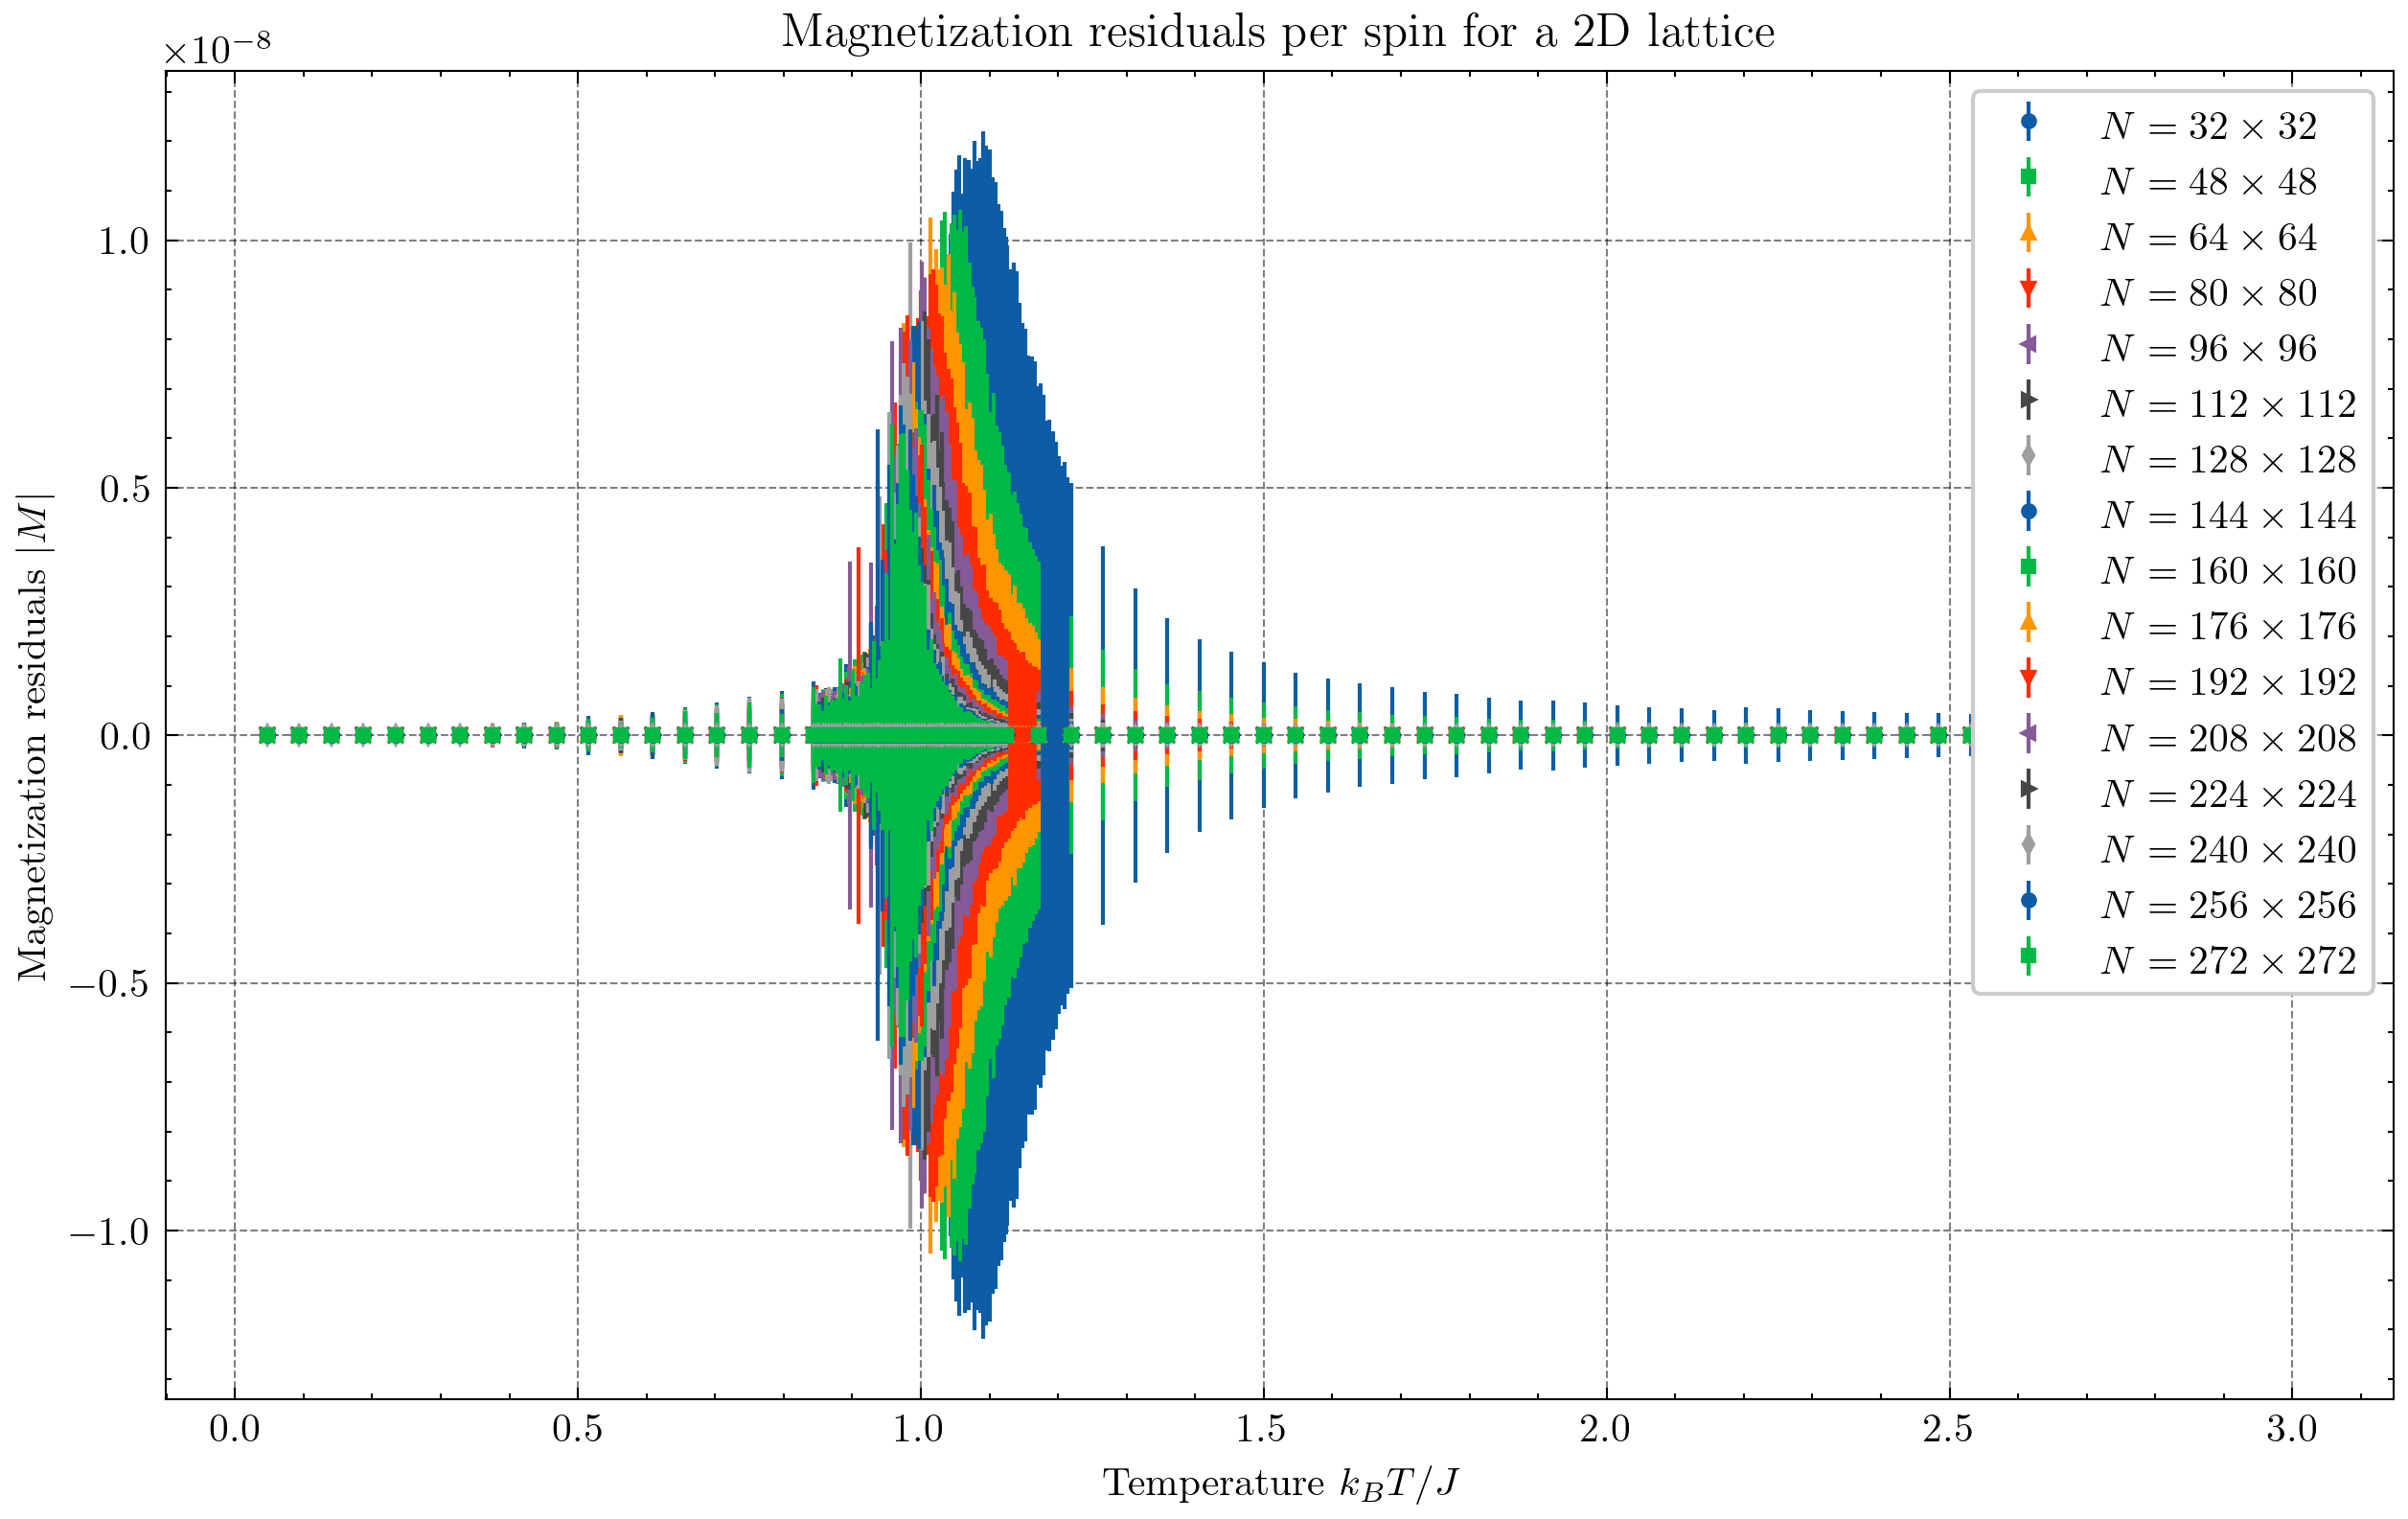

In [8]:
fig, ax = plt.subplots()
for size in pd.read_sql_query(f'SELECT size FROM results WHERE dimension = 2 AND run_id = \'{current_run}\' GROUP BY size ORDER BY size', con)['size']:
    data = pd.read_sql_query(f'SELECT temperature, magnet, magnet_std FROM results WHERE dimension = 2 AND run_id = \'{current_run}\' AND size = \'{size}\' ORDER BY temperature', con)
    ax.errorbar(data['temperature'], [0] * len(data['magnet_std']), yerr=data['magnet_std'], label=f'$N = {size} \\times {size}$')

    ax.set_title(f'Magnetization residuals per spin for a 2D lattice')
    ax.set_xlabel('Temperature $k_B T / J$')
    ax.set_ylabel('Magnetization residuals $\\lvert M \\rvert$')

    ax.legend()

fig.savefig('figures/Magnetization_Residuals.pdf', bbox_inches='tight')

# Specific Heat

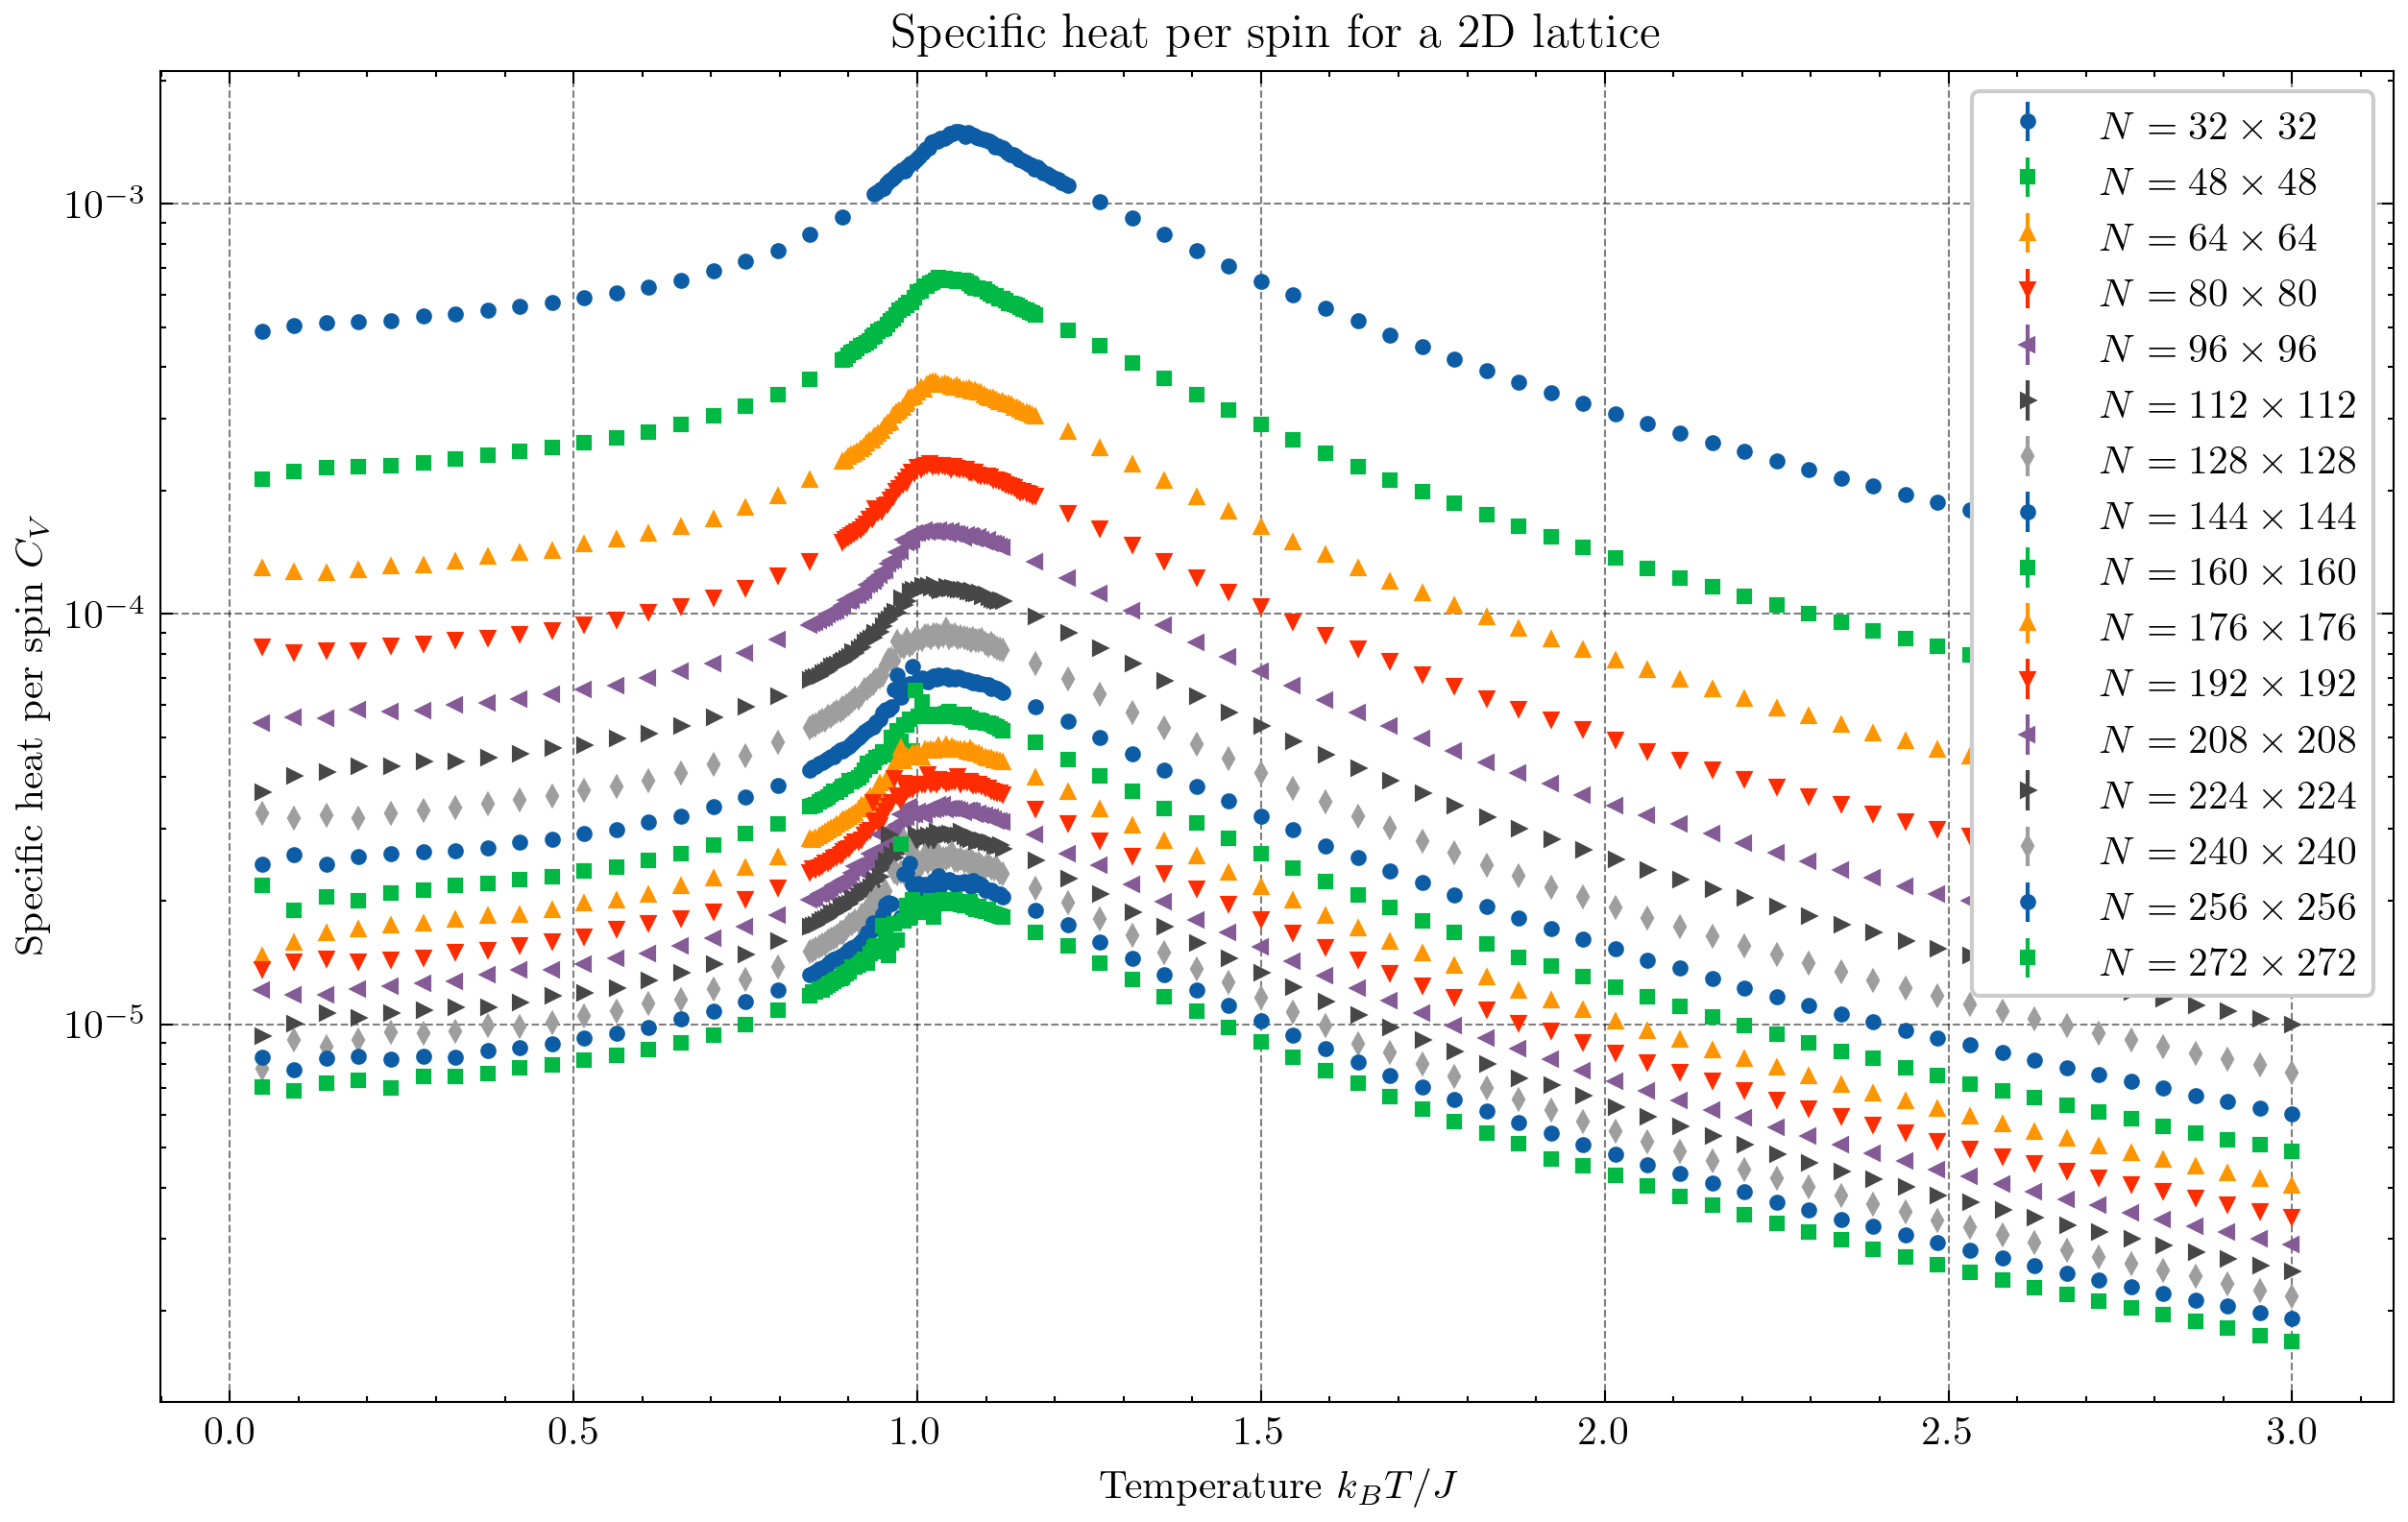

In [9]:
fig, ax = plt.subplots()
for size in pd.read_sql_query(f'SELECT size FROM results WHERE dimension = 2 AND run_id = \'{current_run}\' GROUP BY size ORDER BY size', con)['size']:
    data = pd.read_sql_query(f'SELECT temperature, specific_heat, specific_heat_std FROM results WHERE dimension = 2 AND run_id = \'{current_run}\' AND size = \'{size}\' ORDER BY temperature', con)
    ax.errorbar(data['temperature'], data['specific_heat'], yerr=data['specific_heat_std'], label=f'$N = {size} \\times {size}$')

    ax.set_title(f'Specific heat per spin for a 2D lattice')
    ax.set_xlabel('Temperature $k_B T / J$')
    ax.set_ylabel('Specific heat per spin $C_V$')

    ax.set_yscale('log')
    ax.legend()

fig.savefig('figures/Specific_Heat.pdf', bbox_inches='tight')

# Magnetic susceptibility

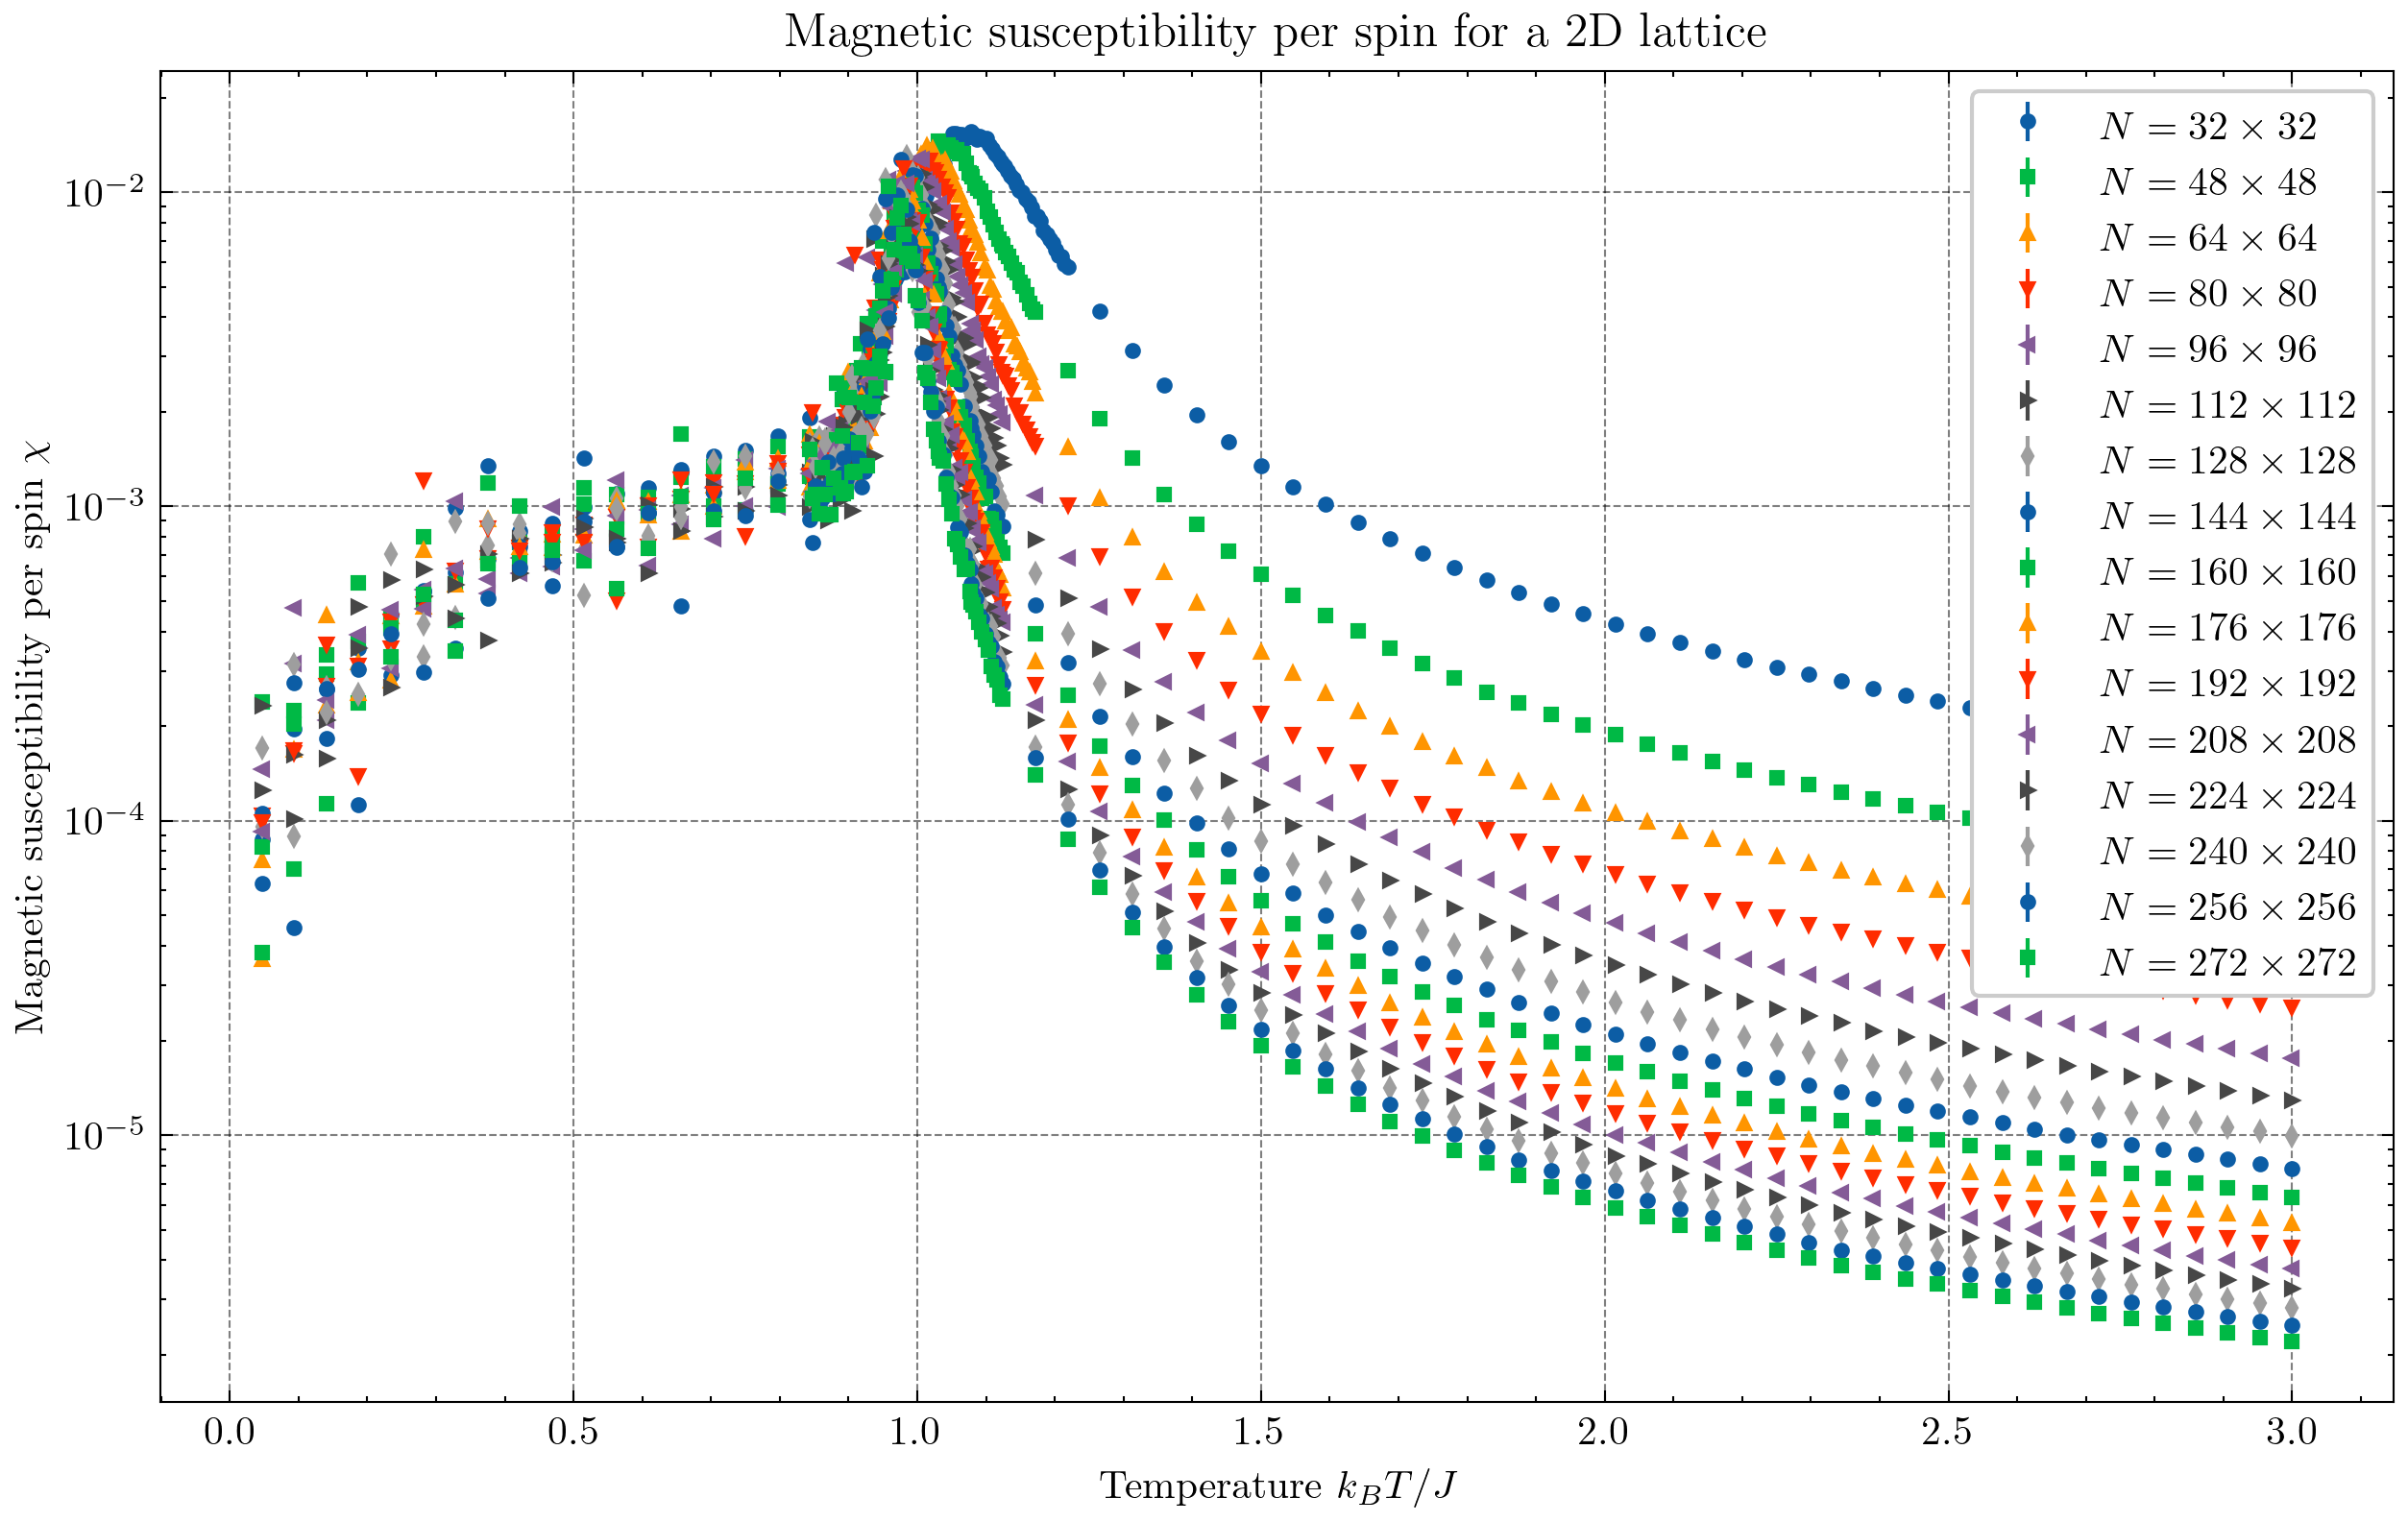

In [10]:
fig, ax = plt.subplots()
for size in pd.read_sql_query(f'SELECT size FROM results WHERE dimension = 2 AND run_id = \'{current_run}\' GROUP BY size ORDER BY size', con)['size']:
    data = pd.read_sql_query(f'SELECT temperature, magnet_suscept, magnet_suscept_std FROM results WHERE dimension = 2 AND run_id = \'{current_run}\' AND size = \'{size}\' ORDER BY temperature', con)
    ax.errorbar(data['temperature'], data['magnet_suscept'], yerr=data['magnet_suscept_std'], label=f'$N = {size} \\times {size}$')

    ax.set_title(f'Magnetic susceptibility per spin for a 2D lattice')
    ax.set_xlabel('Temperature $k_B T / J$')
    ax.set_ylabel('Magnetic susceptibility per spin $\\chi$')

    ax.set_yscale('log')
    ax.legend()

fig.savefig('figures/Magnetic_Susceptibility.pdf', bbox_inches='tight')

R Squared: 0.93


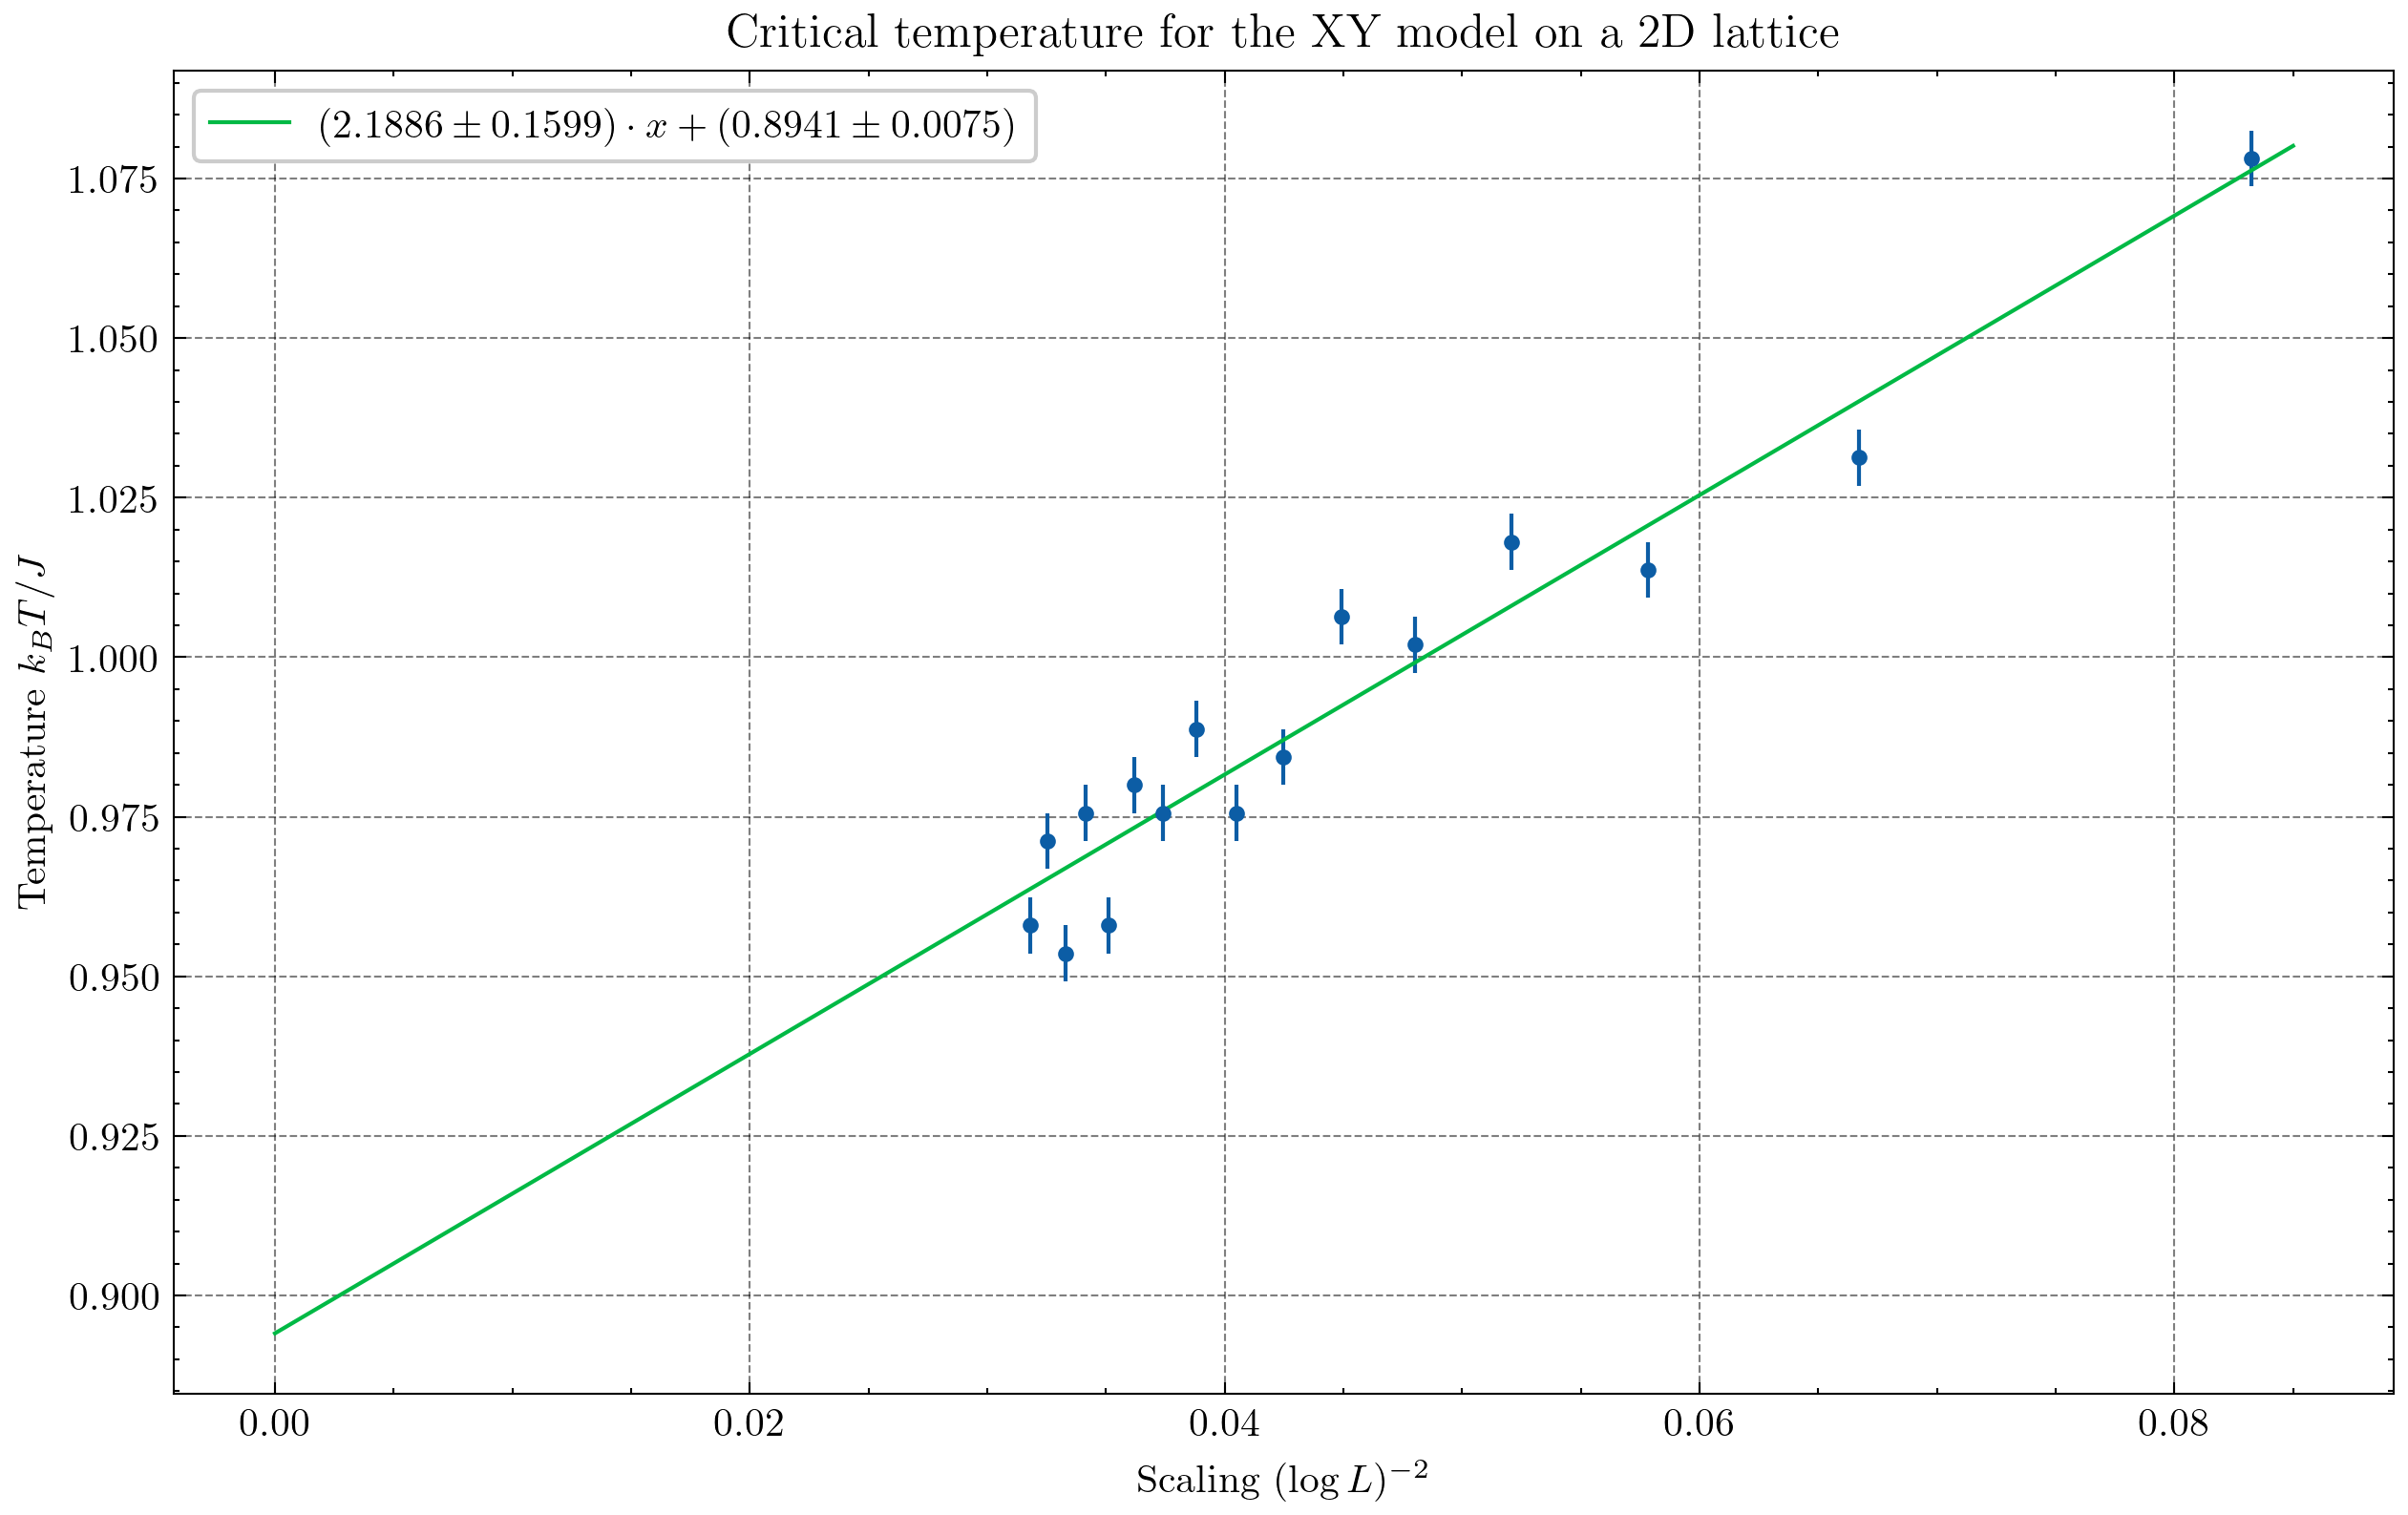

In [11]:
def linear_fn(x: float, slope: float, intercept: float) -> float:
    return slope * x + intercept

data = pd.read_sql_query(f'''SELECT 1.0 / POWER(LN(r.size), 2) AS size, r.temperature, o.delta AS delta
                             FROM (SELECT id, size, temperature, MAX(magnet_suscept) FROM results WHERE dimension = 2 AND run_id = 1 GROUP by size) AS r
                             INNER JOIN (SELECT id, ABS(temperature - LAG(temperature, 1, 0) OVER (PARTITION BY run_id, dimension, size ORDER BY temperature)) AS delta FROM results) AS o ON r.id = o.id''', con)

fig, ax = plt.subplots(figsize=(10, 6))
ax.errorbar(data['size'], data['temperature'], yerr=data['delta'])

popt, pcov = curve_fit(linear_fn, data['size'], data['temperature'])
perr = np.sqrt(np.diag(pcov))

residuals = data['temperature'] - linear_fn(data['size'], *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((data['temperature'] - np.mean(data['temperature']))**2)
r_squared = 1 - (ss_res / ss_tot)
print(f'R Squared: {r_squared:.2f}')

sampling = np.linspace(0, 0.085, num=100)
ax.plot(sampling, linear_fn(sampling, *popt), '-', label=f'$({popt[0]:.4f} \\pm {perr[0]:.4f}) \\cdot x + ({popt[1]:.4f} \\pm {perr[1]:.4f})$')

ax.set_title('Critical temperature for the XY model on a 2D lattice')
ax.set_xlabel('Scaling $(\\log{L})^{-2}$')
ax.set_ylabel('Temperature $k_B T / J$')

ax.legend()
fig.savefig('figures/Critical_Temperature.pdf', bbox_inches='tight')

# Critical Slowing Down

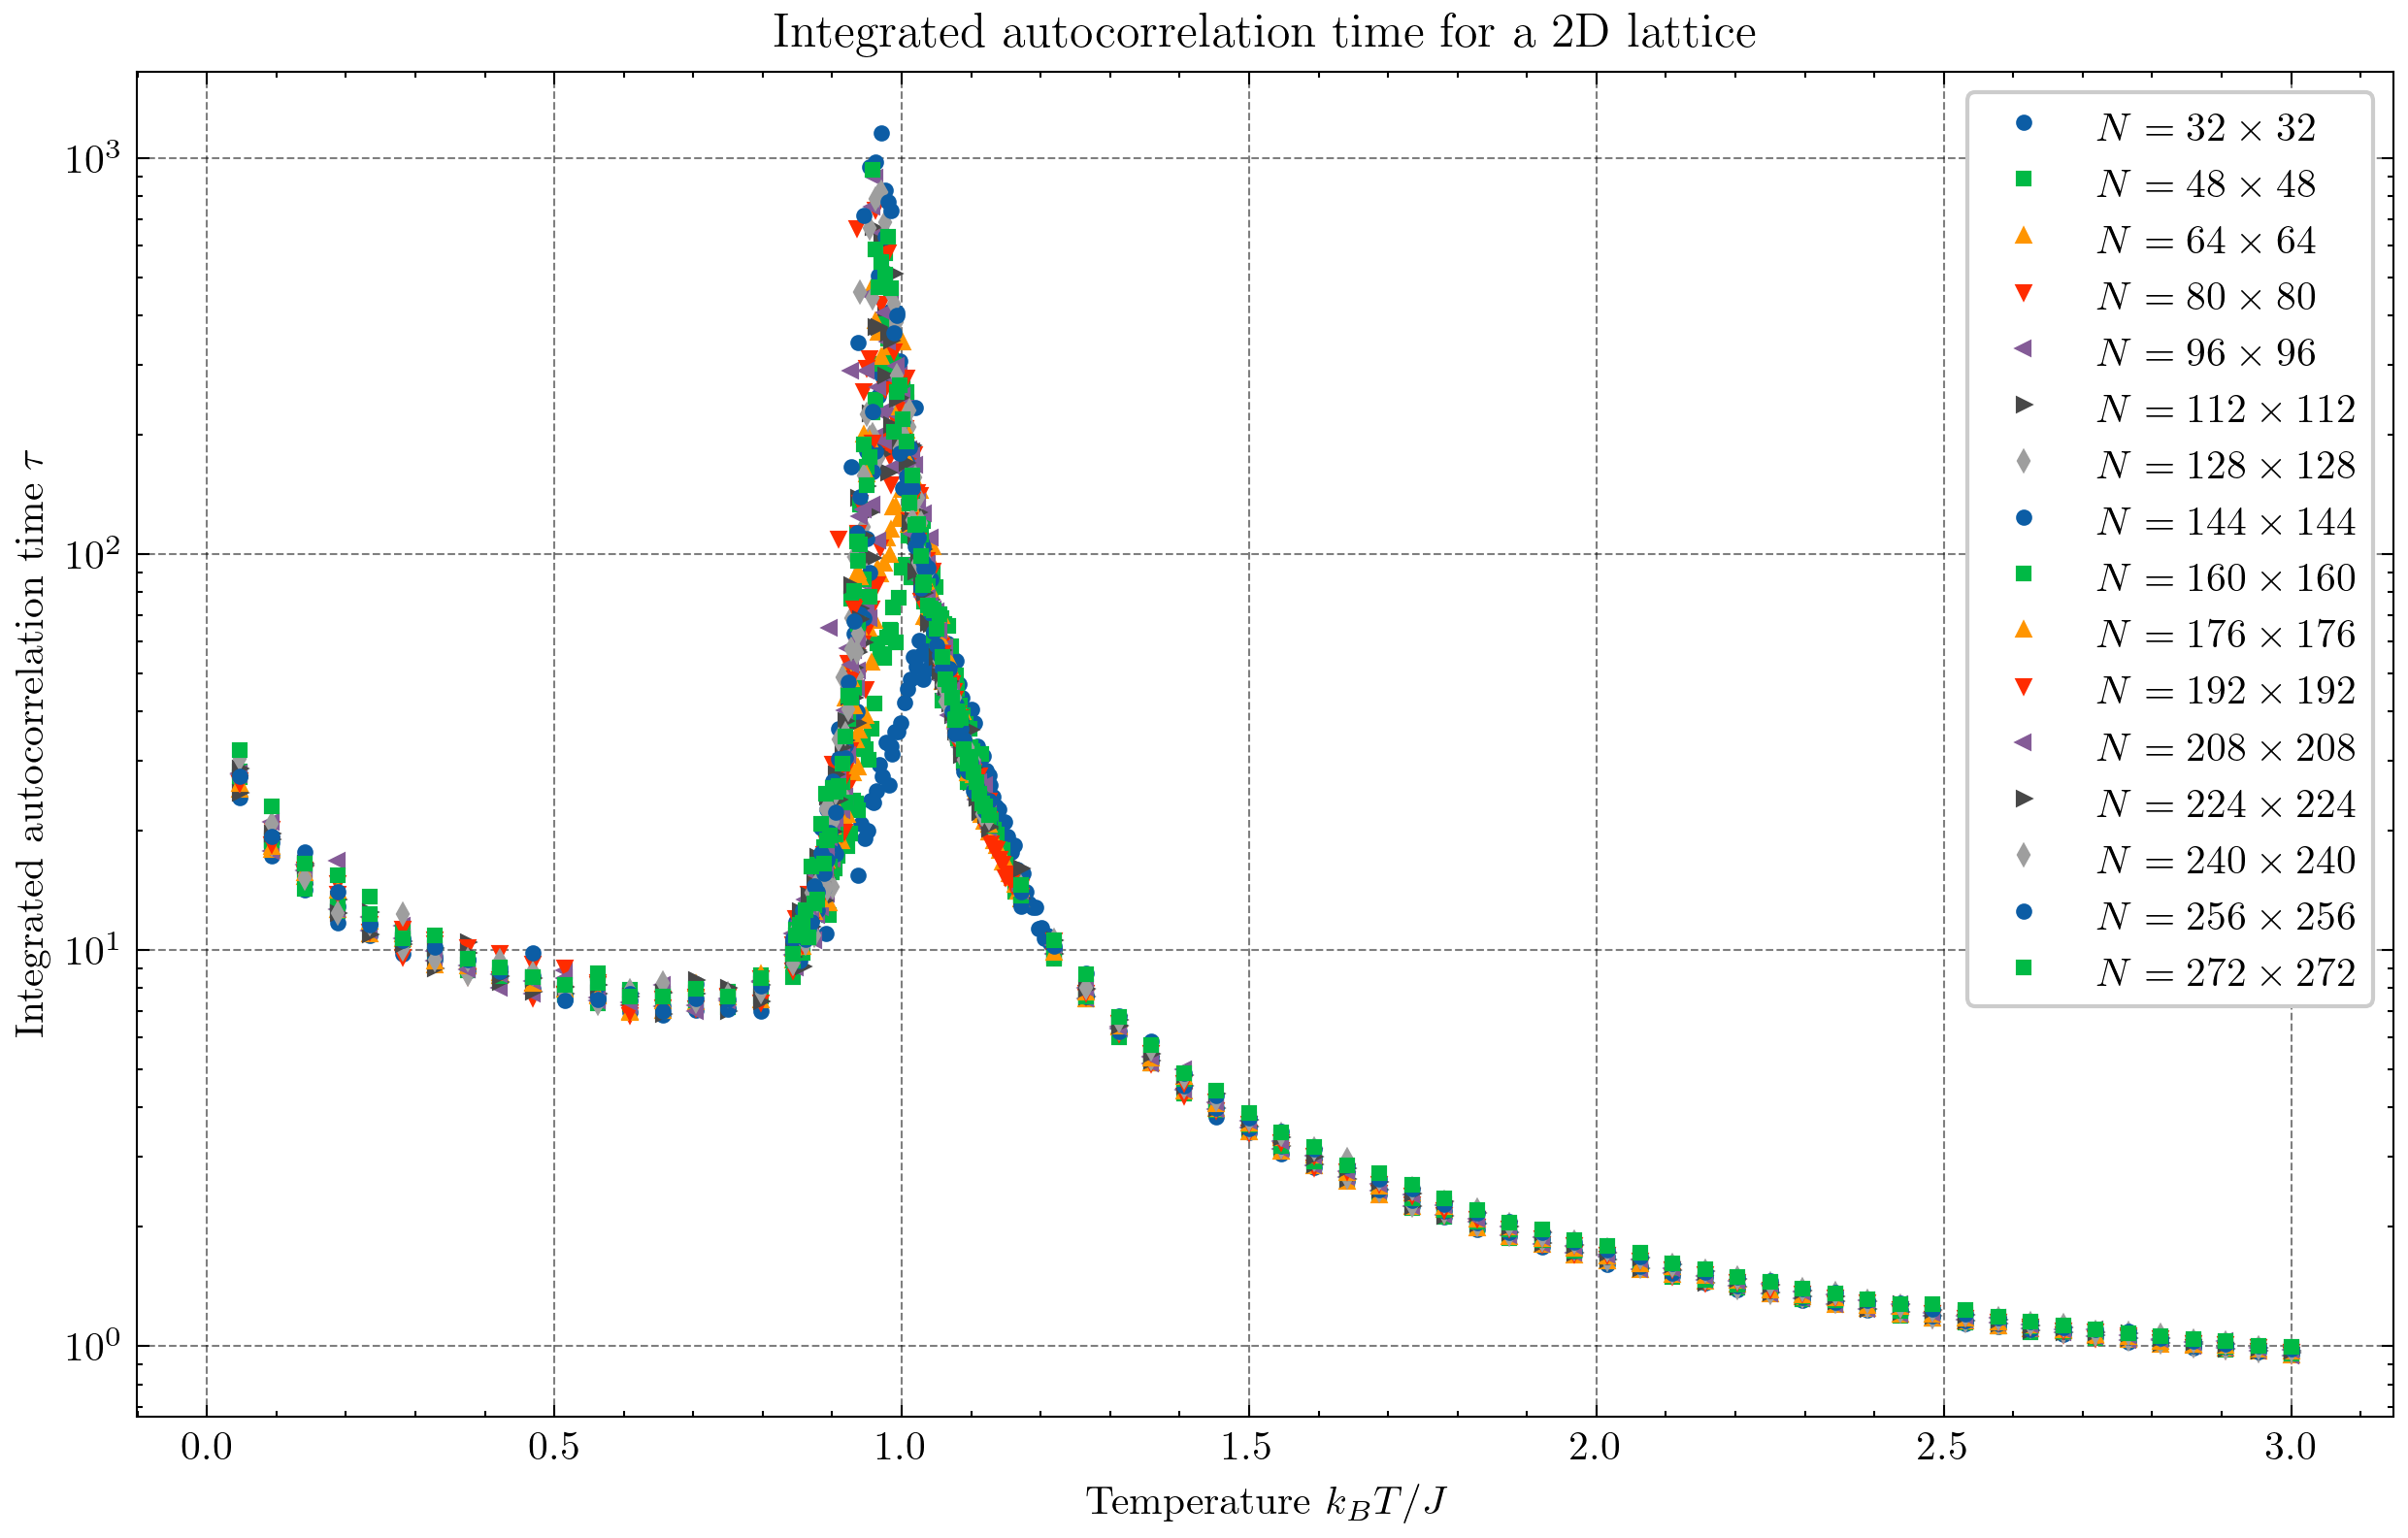

In [12]:
fig, ax = plt.subplots()
for size in pd.read_sql_query(f'SELECT dimension, size FROM results WHERE run_id = \'{current_run}\' GROUP BY size ORDER BY size', con)['size']:
    data = pd.read_sql_query(f'SELECT temperature, energy_tau FROM results WHERE dimension = 2 AND run_id = \'{current_run}\' AND size = \'{size}\' ORDER BY temperature', con)
    ax.errorbar(data['temperature'], data['energy_tau'], label=f'$N = {size} \\times {size}$')

    ax.set_yscale('log')
    ax.set_title(f'Integrated autocorrelation time for a 2D lattice')
    ax.set_xlabel('Temperature $k_B T / J$')
    ax.set_ylabel('Integrated autocorrelation time $\\tau$')

    ax.legend()

fig.savefig('figures/Critical_Slowing_Down.pdf', bbox_inches='tight')

# Scaling

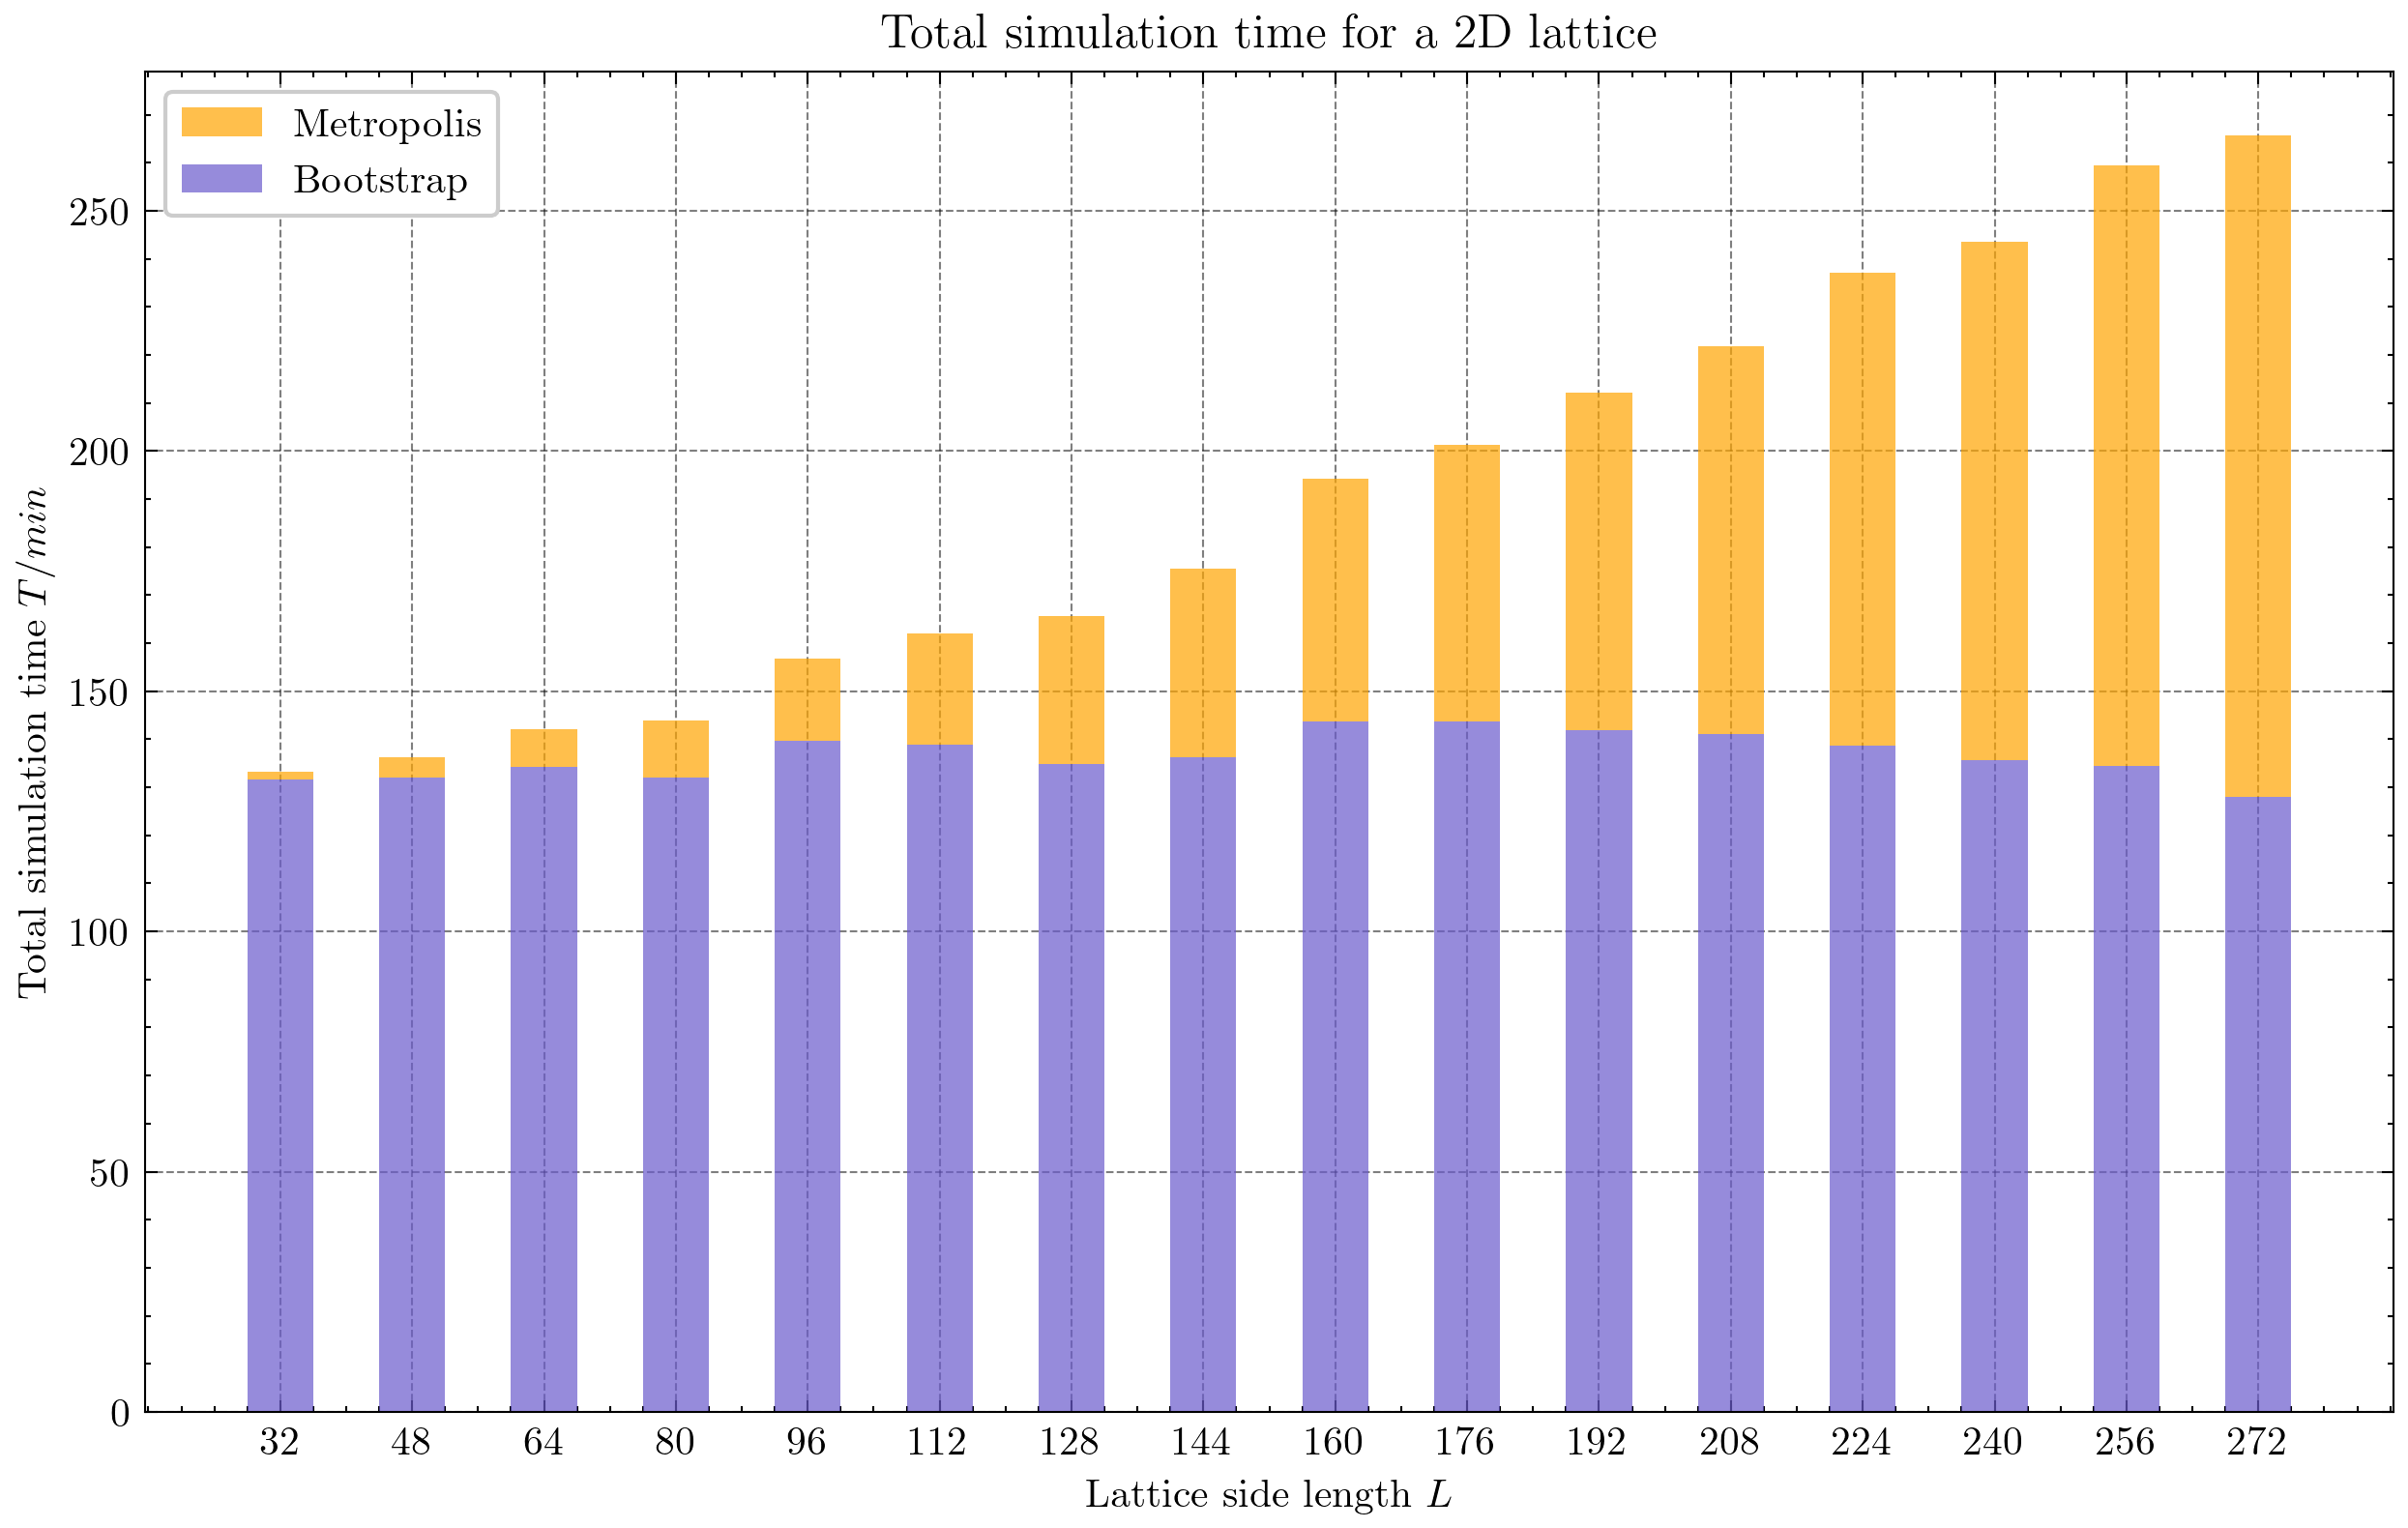

In [13]:
data = pd.read_sql_query(f'SELECT size, dimension, MAX(time_mc) / (60.0 * 1000) AS mc, SUM(time_boot) / (64.0 * 60 * 1000) AS boot FROM results WHERE dimension = 2 AND run_id = \'{current_run}\' GROUP BY size', con)

fig, ax = plt.subplots()
ax.bar(data['size'], data['mc'], width=8, alpha=0.7, color='orange', label='Metropolis', bottom=data['boot'])
ax.bar(data['size'], data['boot'], width=8, alpha=0.7, color='slateblue', label='Bootstrap')

ax.set_title(f'Total simulation time for a 2D lattice')
ax.set_xlabel('Lattice side length $L$')
ax.set_ylabel('Total simulation time $T / min$')
ax.set_xticks(data['size'], labels=data['size'])

ax.legend()

fig.savefig('figures/Time_Scaling.pdf', bbox_inches='tight')

# Scheduling

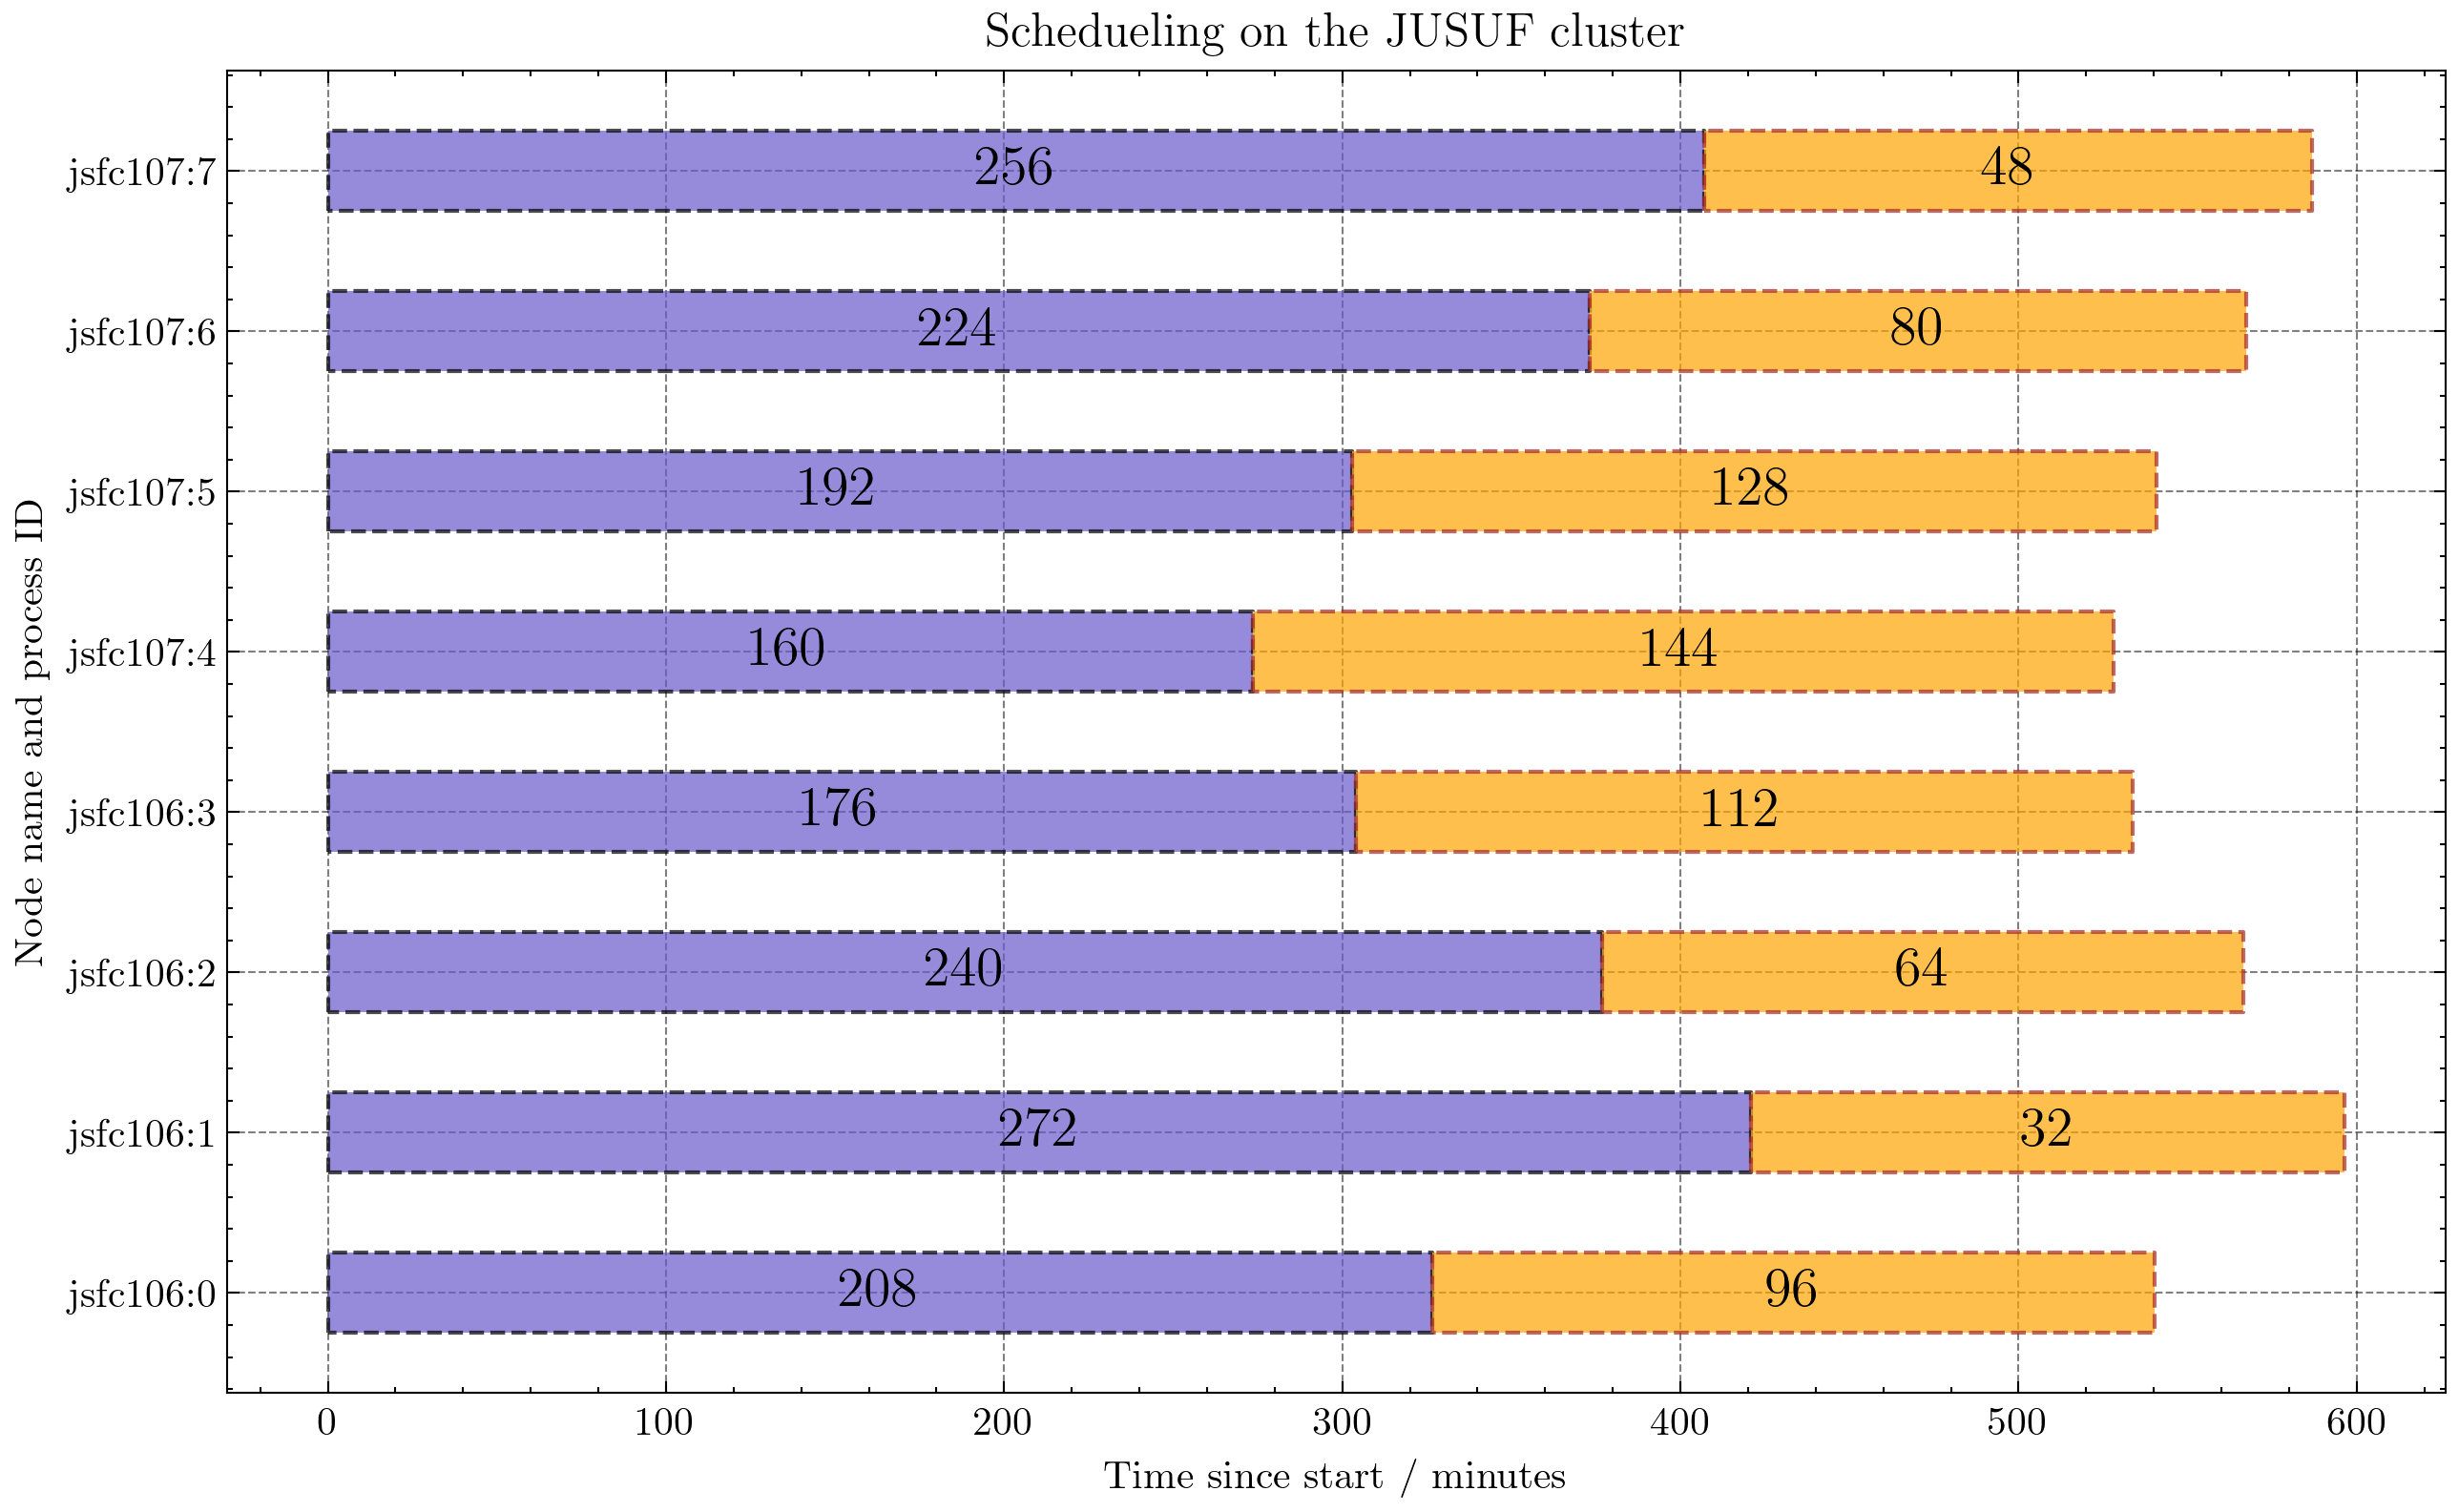

In [14]:
data = pd.read_sql_query(f'SELECT a.size, a.node, CAST(a.process AS TEXT) AS process, a.allocated_at / 60.0 AS allocated_at, (a.finished_at - a.allocated_at) / 60.0 AS duration FROM allocations AS a INNER JOIN results AS r ON r.run_id = a.run_id AND r.dimension = a.dimension AND r.size = a.size WHERE a.run_id = \'{current_run}\' AND a.dimension = 2 GROUP BY a.size, a.node, a.process, a.allocated_at ORDER BY a.node, a.process, allocated_at ASC', con)

min = data['allocated_at'].min()
data['allocated_at'] = data['allocated_at'].transform(lambda x: x - min)

fig, ax = plt.subplots()
for idx, (node, group) in enumerate(data.groupby(['node', 'process'])):
    allocations = list(group[['allocated_at', 'duration']].itertuples(index=False, name=None))
    ax.broken_barh(allocations, (idx * 1 - 0.25, 0.5), linewidth=1, color=['slateblue', 'orange'], alpha=0.7, edgecolor=['black', 'brown', 'green', 'blue'], linestyle='dashed')

    sizes = list(group[['size', 'allocated_at', 'duration']].itertuples(index=False, name=None))
    for size, x1, x2 in sizes:
        ax.text(x=x1 + x2/2, y=idx, s=size, ha='center', va='center', fontsize=14, weight='bold')

labels = list(map(lambda x: f'{x[0]}:{x[1]}', data[['node', 'process']].itertuples(index=False, name=None)))
ax.set_yticks(range(len(np.unique(labels))), labels=np.unique(labels))
ax.set_xlabel('Time since start / minutes')
ax.set_ylabel('Node name and process ID')
ax.set_title(f'Schedueling on the JUSUF cluster')

fig.savefig('figures/Schedueling.pdf', bbox_inches='tight')

# Vortices

In [ ]:
data = pd.read_sql_query(f'SELECT size, temperature, spins FROM vortices WHERE dimension = 2 AND run_id = \'{current_run}\' AND size = 64 ORDER BY id ASC', con)

fig, ax = plt.subplots()
ax.set_box_aspect(1)

def animate(n: int):
    ax.cla()
    row = data.iloc[n]

    spins = np.array(json.loads(row['spins']))
    u = np.reshape(np.cos(spins), (-1, row['size']))
    v = np.reshape(np.sin(spins), (-1, row['size']))

    x = np.arange(1, row['size'] + 1, 1)
    y = np.arange(1, row['size'] + 1, 1)

    X, Y = np.meshgrid(x, y)
    ax.quiver(X, Y, u, v, spins, scale=40, pivot='middle', cmap='hsv')
    ax.set_title(f'Temperature $T={row['temperature']:.5f}$')

    print(f'\rFrame: {n}/750', end='', flush=True)
    return fig

anim = FuncAnimation(fig = fig, func = animate, frames = 2700, interval = 1, repeat = False)
anim.save('figures/vortices.mp4', dpi=300, codec="libx264", fps=60)

Frame: 2/750